# PROGRAMMING ASSIGNMENT 2



---



### K K N SHYAM SATHVIK - B22EE036



---



# Decision Tree


<li>This problem is designed to help you understand the imple-
mentation aspects of a decision tree (DT).
<li>You are given a dataset: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv.
<li>It contains data to classify whether someone will survive in the Titanic wreck.
<li>You need to implement a classification decision tree (DT) from scratch (you
are not permitted to use any 3rd-party library’s function for the classifier,
e.g., Scikit.
<li>You may, however, use built-in functions for auxiliary tasks like
train/test split, etc.).
<li>The implementation includes the following tasks.

### Imports and Setting up the env

In [1]:
#Data Structures
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn


#Splitting
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

#Comparision
from sklearn.tree import DecisionTreeClassifier

#Supress-Warnings
import warnings
warnings.filterwarnings('ignore')

import pprint
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_recall_fscore_support

### Data Fetching

In [2]:
#import data
# url = "https://github.com/datasciencedojo/datasets/blob/master/titanic.csv"
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv" # change the adress this way to procure the raw csv files
raw_data = pd.read_csv(url)
#raw data
display(raw_data)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Task 1
<li> Pre-processing
<li> Visualization

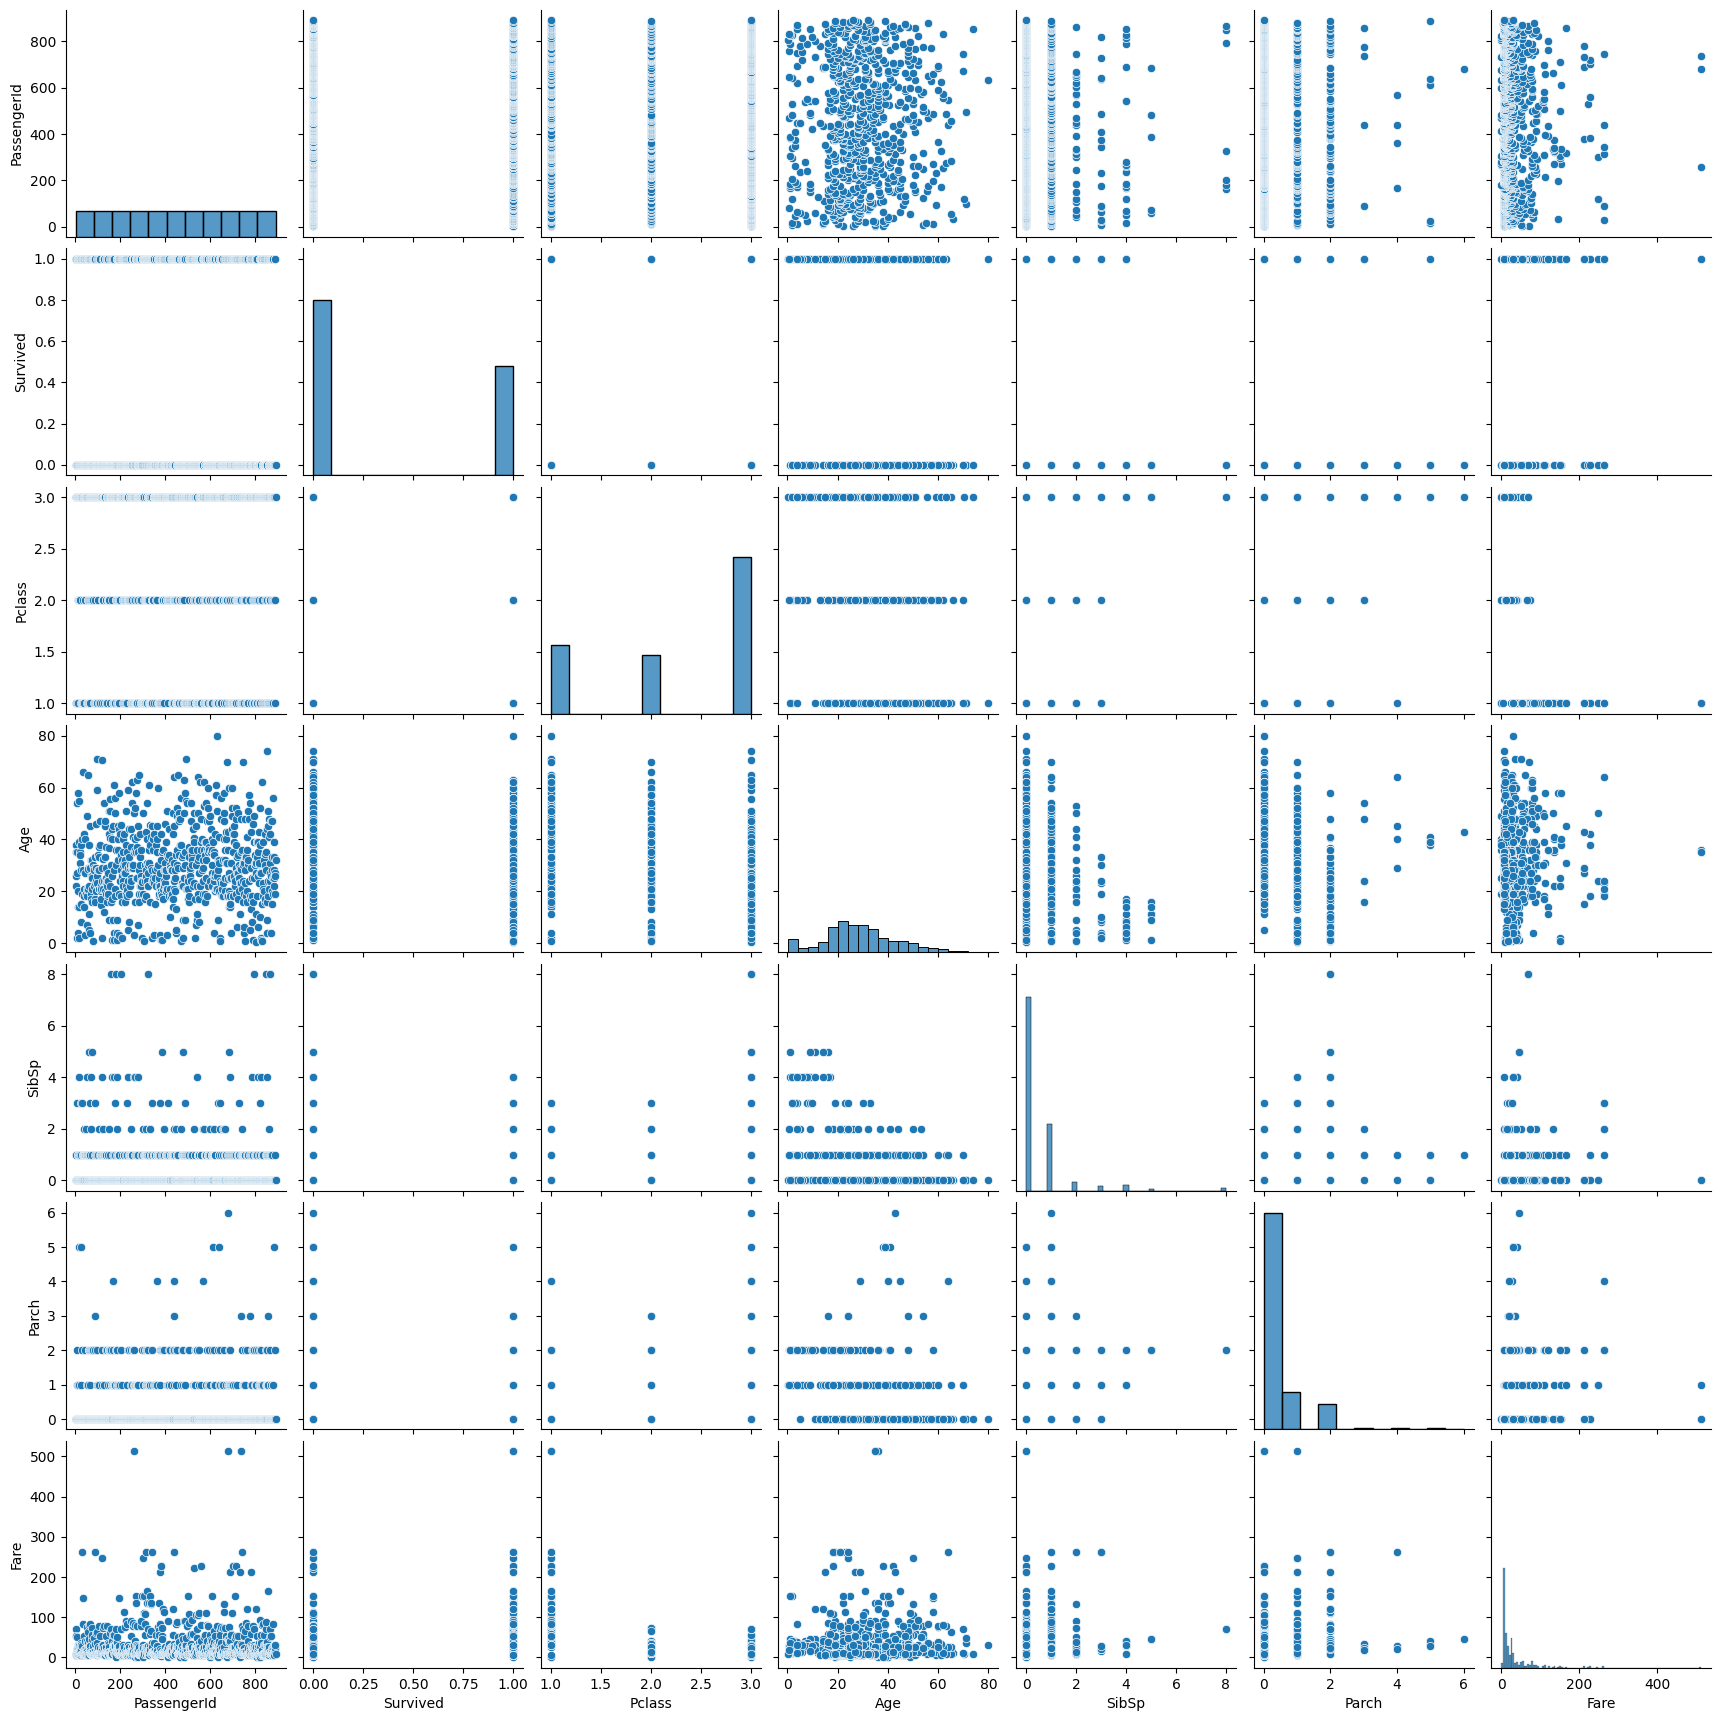

In [3]:
# Generate the pair plot
seaborn.pairplot(raw_data)
# Display the plot
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

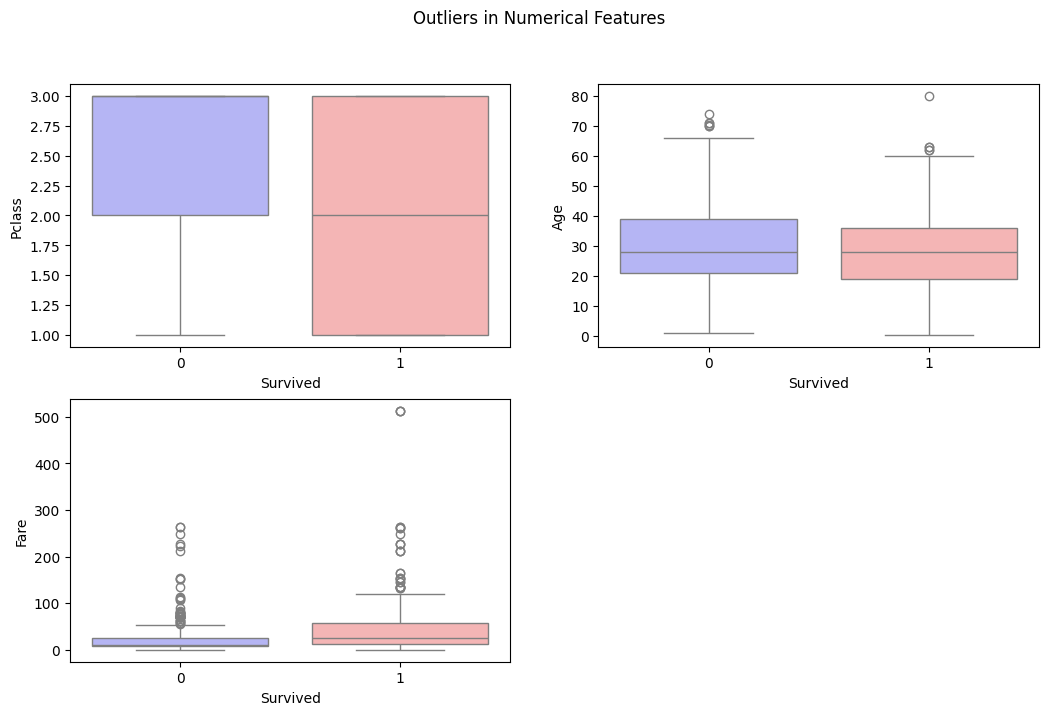

In [4]:
#check for outliers
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = raw_data, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = raw_data, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = raw_data, x = "Survived", y = "Fare", palette = "bwr")

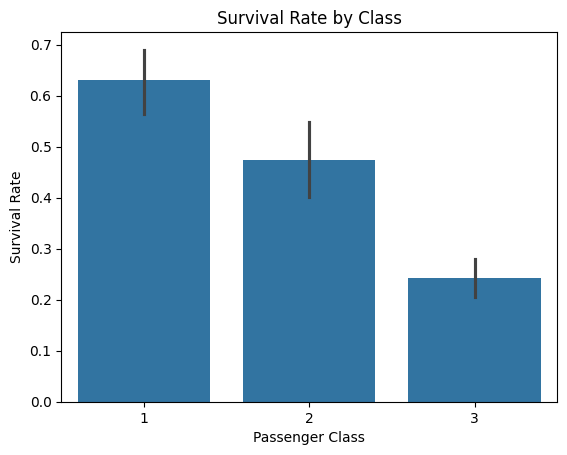

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=raw_data)
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

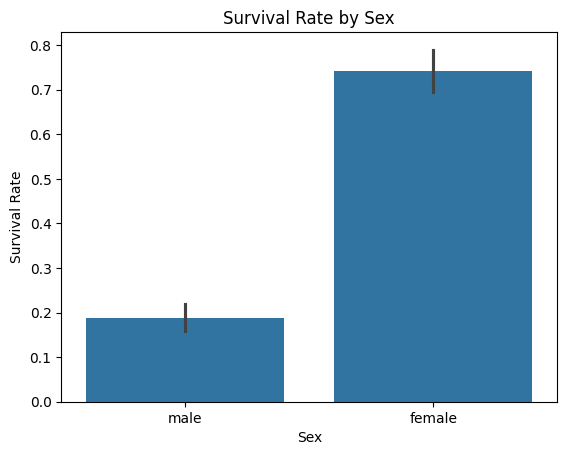

In [6]:
sns.barplot(x='Sex', y='Survived', data=raw_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

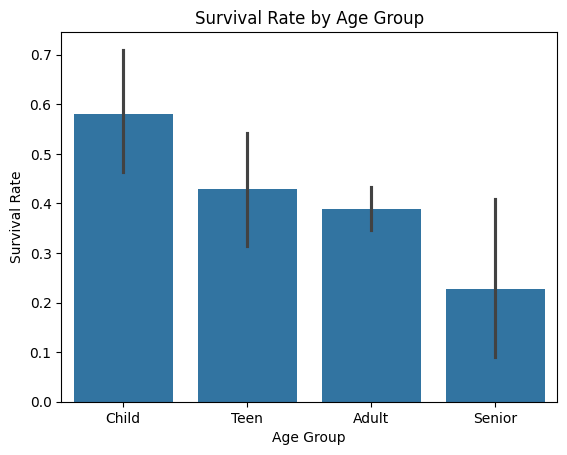

In [7]:
age = raw_data.copy()
age['AgeGroup'] = pd.cut(raw_data['Age'], bins=[0, 12, 18, 60, np.inf], labels=['Child', 'Teen', 'Adult', 'Senior'])

# Now, plot the survival rate by these age groups
sns.barplot(x='AgeGroup', y='Survived', data=age)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

<Axes: xlabel='Survived', ylabel='Embarked'>

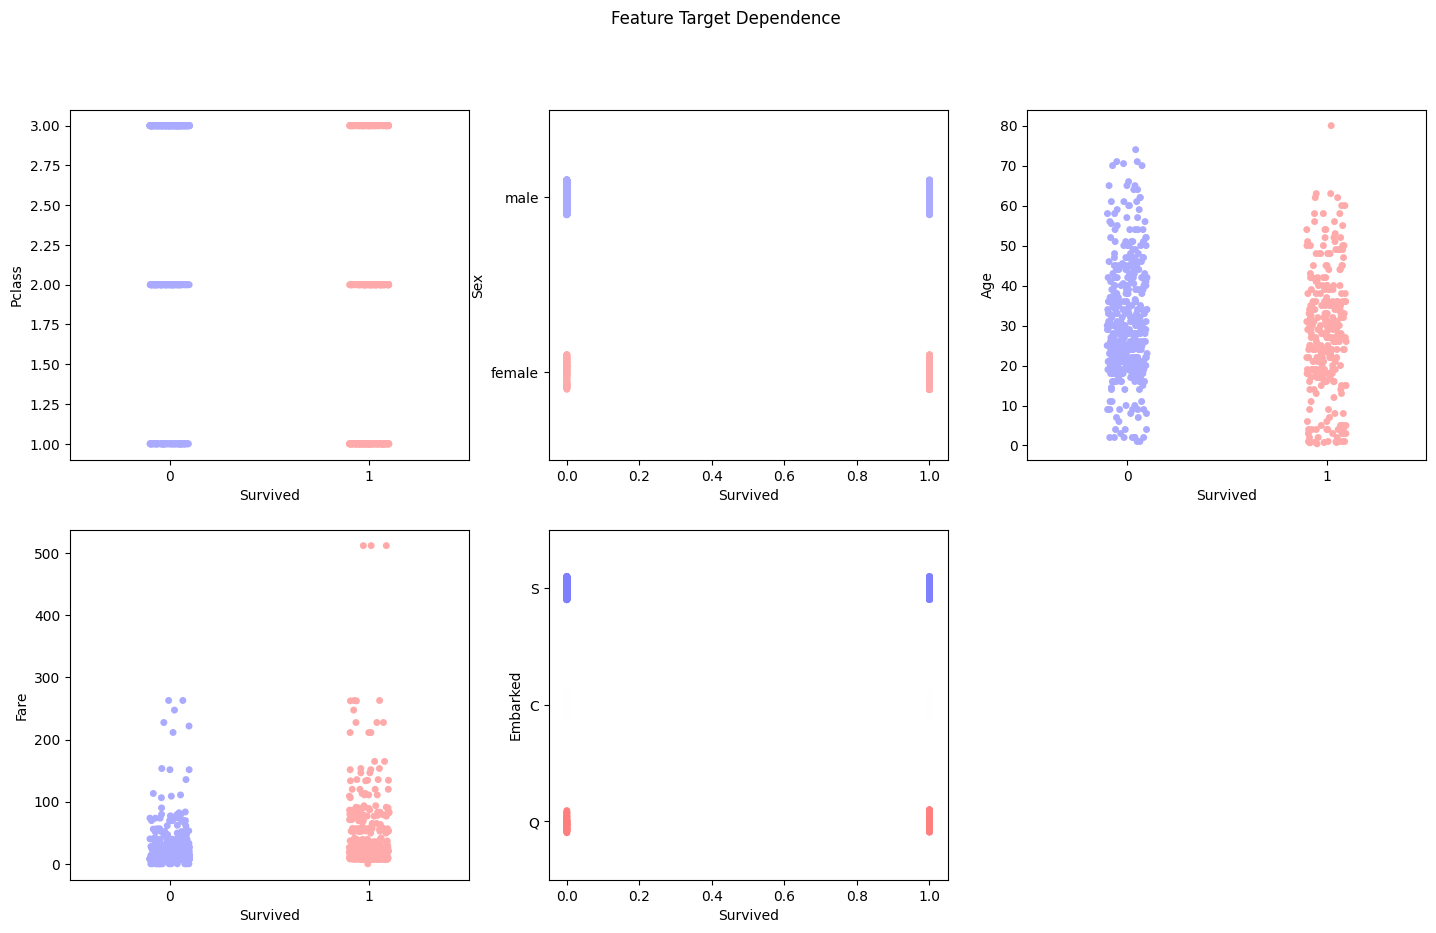

In [8]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")
sns.stripplot(ax = axes[0, 0], data = raw_data, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = raw_data, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = raw_data, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = raw_data, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = raw_data, x = "Survived", y = "Embarked", palette = "bwr")

### Pre-Processing
<li> Feature Engineering Reference: https://www.ahmedbesbes.com/blog/kaggle-titanic-competition
<li> Feature Engineering choices are explained in the report.

<Axes: xlabel='index'>

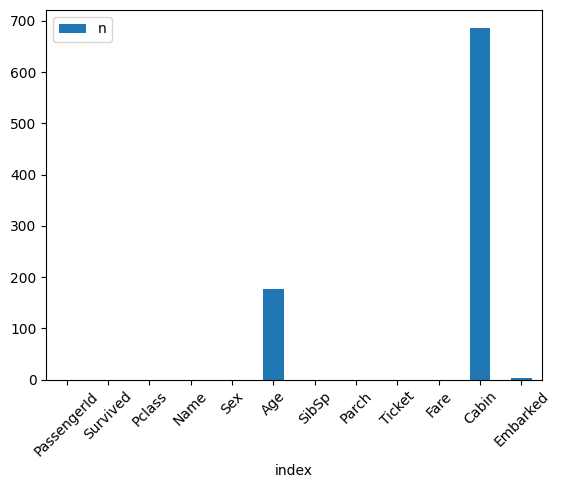

In [9]:
raw_data.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [10]:
def return_columns_with_missing_values(df):
    missing = {}
    for col in df.columns:
        count = df[col].isna().sum()
        # print(count)
        if count != 0:
            missing[col] = count
    return missing

In [11]:
print(return_columns_with_missing_values(raw_data))

{'Age': 177, 'Cabin': 687, 'Embarked': 2}


### Data Cleaning

*Handling Embarked: fill missing values with the mode (most frequent value)*


In [12]:
raw_data['Embarked'].fillna(raw_data['Embarked'].mode()[0], inplace=True)
raw_data = pd.get_dummies(raw_data, columns=['Embarked'], prefix='Emb', drop_first=True)
# display(raw_data.head(5))

*Handling Age: Filled missing values with the median*


In [13]:
raw_data['Age'].fillna(raw_data['Age'].median(), inplace=True)

### Feature Engineering

In [14]:
# Extracting titles from 'Name' and mapping to title categories
raw_data['Title'] = raw_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
raw_data['Title'] = raw_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
raw_data['Title'] = raw_data['Title'].replace('Mlle', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Ms', 'Miss')
raw_data['Title'] = raw_data['Title'].replace('Mme', 'Mrs')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
raw_data['Title'] = raw_data['Title'].map(title_mapping)
raw_data['Title'] = raw_data['Title'].fillna(0)

### One-Hot Encoding

*Convert 'Sex' into a binary variable (0 for female and 1 for male)*

In [15]:
raw_data['Sex'] = raw_data['Sex'].map({'female': 0, 'male': 1})

### Dropping Columns

In [16]:
raw_data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

### Additional Feature Engineering

In [17]:
raw_data['Cabin'] = raw_data['Cabin'].str[0]
raw_data['Cabin'] = pd.Categorical(raw_data['Cabin']).codes
# raw_data.drop(['Cabin'], axis=1, inplace=True)

raw_data['FamilySize'] = raw_data['SibSp'] + raw_data['Parch'] + 1
raw_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

raw_data['IsAlone'] = 0
raw_data.loc[raw_data['FamilySize'] == 1, 'IsAlone'] = 1

raw_data['Fare'] = raw_data['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

In [18]:
display(raw_data.head())

Survived  Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  \
0         0       3    1  22.0  1.981001     -1      0      1      1   
1         1       1    0  38.0  4.266662      2      0      0      3   
2         1       3    0  26.0  2.070022     -1      0      1      2   
3         1       1    0  35.0  3.972177      2      0      1      3   
4         0       3    1  35.0  2.085672     -1      0      1      1   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1

In [19]:
print(f"Original Data : {len(raw_data)}")
train_data, temp_data = train_test_split(raw_data, test_size=0.3, random_state=42)

# splitting temp_data into validation and test sets (20% of raw_data for validation, 10% for test, from the remaining 30%)
val_data, test_data = train_test_split(temp_data, test_size=(1/3), random_state=42)  # 1/3 of 30% is 10% of the total

# Checking the size of each set
print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")

Original Data : 891
Train: 623, Validation: 178, Test: 90


In [20]:
print("Train")
display(train_data.head(2))
print("Val")
display(val_data.head(2))
print("Test")
display(test_data.head(2))

Train


Survived  Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  \
445         1       1    1   4.0  4.404990      0      0      1      4   
650         0       3    1  28.0  2.066331     -1      0      1      1   

     FamilySize  IsAlone  
445           3        0  
650           1        1

Val


Survived  Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  \
33          0       2    1  66.0  2.351375     -1      0      1      1   
213         0       2    1  30.0  2.564949     -1      0      1      1   

     FamilySize  IsAlone  
33            1        1  
213           1        1

Test


Survived  Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  \
876         0       3    1  20.0  2.287045     -1      0      1      1   
468         0       3    1  28.0  2.044462     -1      1      0      1   

     FamilySize  IsAlone  
876           1        1  
468           1        1

In [21]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
display(X_train.head(2))
display(y_train.head(2))

X_val = val_data.drop('Survived', axis=1)
y_val = val_data['Survived']
display(X_val.head(2))
display(y_val.head(2))

X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']
display(X_test.head(2))
display(y_test.head(2))

Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  FamilySize  \
445       1    1   4.0  4.404990      0      0      1      4           3   
650       3    1  28.0  2.066331     -1      0      1      1           1   

     IsAlone  
445        0  
650        1

445    1
650    0
Name: Survived, dtype: int64

Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  FamilySize  \
33        2    1  66.0  2.351375     -1      0      1      1           1   
213       2    1  30.0  2.564949     -1      0      1      1           1   

     IsAlone  
33         1  
213        1

33     0
213    0
Name: Survived, dtype: int64

Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  FamilySize  \
876       3    1  20.0  2.287045     -1      0      1      1           1   
468       3    1  28.0  2.044462     -1      1      0      1           1   

     IsAlone  
876        1  
468        1

876    0
468    0
Name: Survived, dtype: int64

### TASK 2 and TASK 3
<li><h3> <i>2. Implementing the Entropy Function</h3></i>
<li><h3><i>3. Converting Continuous variables to Categorical variables by making a split</h3><i>

In [22]:
def determine_feature_types(X):
    feature_types = {}
    n_unique_values_threshold = 3
    # Hyperparameter to be adjusted, but it turns out the
    # decision boundaries of the form == and != don't work well enough.
    # This seems to be the cause of these decision boundaries conflicting with
    # the decision boundaries made for continuous variables of the form <= and >.
    for feature in X.columns:
        unique_values = X[feature].unique()
        example_value = unique_values[0]

        # if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_threshold):
        if (isinstance(example_value, str)):
            feature_types[feature] = "categorical"
        else:
            feature_types[feature] = "continuous"
    return feature_types

In [23]:
feature_types_train = determine_feature_types(X_train)
pprint.pprint(feature_types_train)

{'Age': 'continuous',
 'Cabin': 'continuous',
 'Emb_Q': 'continuous',
 'Emb_S': 'continuous',
 'FamilySize': 'continuous',
 'Fare': 'continuous',
 'IsAlone': 'continuous',
 'Pclass': 'continuous',
 'Sex': 'continuous',
 'Title': 'continuous'}


#### Entropy
$$
I_H = -\sum_{j=1}^{c} p_j \log(p_j)
$$


In [24]:
def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy

In [25]:
def conTocat(X, y, split_column, split_point, feature_types):
    # function to split continuous variables into two categories : left and right dataset
    df = pd.concat([X, y.rename('Survived')], axis=1)
    if feature_types[split_column] == "continuous":
        left_partition, right_partition = df[df[split_column] <= split_point], df[df[split_column] > split_point]
    else:
      # This kind of decision making has been discarded since the results weren't fruitful
        left_partition, right_partition = df[df[split_column] == split_point], df[df[split_column] != split_point]
    return left_partition.drop(columns=['Survived']), right_partition.drop(columns=['Survived']), left_partition['Survived'], right_partition['Survived']

#### Cost Function : Information Gain to be maximized

In [26]:
def cost_function(X, y, split_column, split_value, feature_types):
    print(split_column, split_value)
    left_X, right_X, y_left, y_right = conTocat(X, y, split_column, split_value, feature_types)
    if len(y_left) == 0 or len(y_right) == 0:
        return 0  # No gain if split is not possible

    total_entropy = calculate_entropy(y)
    p_left = len(y_left) / len(y)
    p_right = len(y_right) / len(y)
    left_entropy = calculate_entropy(y_left)
    right_entropy = calculate_entropy(y_right)
    gain = total_entropy - (p_left * left_entropy + p_right * right_entropy)

    return gain

#### Demonstration of conTocat

In [27]:
# r, l = conTocat(X_train, y_train, "Fare", 2.0, feature_types_train)

In [28]:
# display(r.head(5))
# display(l.head(5))

### Task 4 : Training the tree

#### (a). Gets the attribute that leads to the best split.

In [29]:
def identify_splits(X):
    possible_splits = {}
    features = X
    # iterate over all data points in each attribute/feature column
    # for column_index in range(num_columns):
    for feature in features:
        # print(type(self.features))
        # get the unique values in each column
        column_values = features[feature]
        unique_column_values = set(column_values)
        possible_splits[feature] = unique_column_values
    return possible_splits

In [30]:
def best_split(X, y, feature_types):
    possible_splits = identify_splits(X)
    best_gain = -1
    best_split_column = None
    best_split_value = None
    for split_column in possible_splits:
        for split_point in possible_splits[split_column]:
            print(f"Split Column : {split_column}, Split Point : {split_point}")
            gain = cost_function(X, y, split_column, split_point, feature_types)
            if gain > best_gain:
                best_gain = gain
                best_split_column = split_column
                best_split_value = split_point

    return best_gain, best_split_column, best_split_value

#### demonstration of identify splits

In [31]:
possible_splits = identify_splits(X_train)
pprint.pprint(possible_splits)  #working as needed
# pprint.pprint(test_tree.split_data())

{'Age': {0.42,
         0.67,
         0.75,
         0.83,
         1.0,
         2.0,
         3.0,
         4.0,
         5.0,
         6.0,
         7.0,
         8.0,
         9.0,
         10.0,
         11.0,
         12.0,
         13.0,
         14.0,
         14.5,
         15.0,
         16.0,
         17.0,
         18.0,
         19.0,
         20.0,
         21.0,
         22.0,
         23.0,
         24.0,
         24.5,
         25.0,
         26.0,
         27.0,
         28.0,
         28.5,
         29.0,
         30.0,
         31.0,
         32.0,
         32.5,
         33.0,
         34.0,
         35.0,
         36.0,
         37.0,
         38.0,
         39.0,
         40.0,
         40.5,
         41.0,
         42.0,
         43.0,
         44.0,
         45.0,
         45.5,
         46.0,
         47.0,
         48.0,
         49.0,
         50.0,
         51.0,
         52.0,
         53.0,
         54.0,
         55.0,
         55.5,
         56.0,
    

In [32]:
display(X_train['Pclass'])

445    1
650    3
172    3
450    2
314    2
      ..
106    3
270    1
860    3
435    1
102    1
Name: Pclass, Length: 623, dtype: int64

#### demonstration of best split

In [33]:
# r, l = best_split(X_train, "Sex", "female")
gain, col, point = best_split(X_train, y_train, feature_types_train)
print(gain, col, point)
# fixed typo, working now.

Split Column : Pclass, Split Point : 1
Pclass 1
Split Column : Pclass, Split Point : 2
Pclass 2
Split Column : Pclass, Split Point : 3
Pclass 3
Split Column : Sex, Split Point : 0
Sex 0
Split Column : Sex, Split Point : 1
Sex 1
Split Column : Age, Split Point : 0.75
Age 0.75
Split Column : Age, Split Point : 1.0
Age 1.0
Split Column : Age, Split Point : 2.0
Age 2.0
Split Column : Age, Split Point : 3.0
Age 3.0
Split Column : Age, Split Point : 4.0
Age 4.0
Split Column : Age, Split Point : 5.0
Age 5.0
Split Column : Age, Split Point : 6.0
Age 6.0
Split Column : Age, Split Point : 7.0
Age 7.0
Split Column : Age, Split Point : 8.0
Age 8.0
Split Column : Age, Split Point : 9.0
Age 9.0
Split Column : Age, Split Point : 10.0
Age 10.0
Split Column : Age, Split Point : 11.0
Age 11.0
Split Column : Age, Split Point : 12.0
Age 12.0
Split Column : Age, Split Point : 13.0
Age 13.0
Split Column : Age, Split Point : 14.0
Age 14.0
Split Column : Age, Split Point : 15.0
Age 15.0
Split Column : Age, Sp

#### (b). Makes the split according the best split and recursively creates new branches and stores the tree in the form of a dictionary.

In [34]:
def build_tree(X, y, feature_types, current_depth=0, max_depth=20, min_samples_split=2, min_gain=0.01):
    if len(y) <= min_samples_split or current_depth >= max_depth:
        return y.mode()[0]

    gain, split_column, split_point = best_split(X, y, feature_types)
    if gain <= min_gain:
        return y.mode()[0]

    left_X, right_X, y_left, y_right = conTocat(X, y, split_column, split_point, feature_types)
    if len(y_left) == 0 or len(y_right) == 0:
        return y.mode()[0]

    question = "{} <= {:.2f}".format(split_column, split_point) if feature_types[split_column] == "continuous" else "{} == {}".format(split_column, split_point)
    subtree = {question: []}

    yes_answer = build_tree(left_X, y_left, feature_types, current_depth + 1, max_depth, min_samples_split, min_gain)
    no_answer = build_tree(right_X, y_right, feature_types, current_depth + 1, max_depth, min_samples_split, min_gain)

    if yes_answer == no_answer:
        subtree = yes_answer
    else:
        subtree[question].append(yes_answer)
        subtree[question].append(no_answer)

    return subtree


#### Experiment 1

#### Tree logs

In [35]:
tree = build_tree(X= X_train, y= y_train, max_depth = 1, feature_types = feature_types_train)

Split Column : Pclass, Split Point : 1
Pclass 1
Split Column : Pclass, Split Point : 2
Pclass 2
Split Column : Pclass, Split Point : 3
Pclass 3
Split Column : Sex, Split Point : 0
Sex 0
Split Column : Sex, Split Point : 1
Sex 1
Split Column : Age, Split Point : 0.75
Age 0.75
Split Column : Age, Split Point : 1.0
Age 1.0
Split Column : Age, Split Point : 2.0
Age 2.0
Split Column : Age, Split Point : 3.0
Age 3.0
Split Column : Age, Split Point : 4.0
Age 4.0
Split Column : Age, Split Point : 5.0
Age 5.0
Split Column : Age, Split Point : 6.0
Age 6.0
Split Column : Age, Split Point : 7.0
Age 7.0
Split Column : Age, Split Point : 8.0
Age 8.0
Split Column : Age, Split Point : 9.0
Age 9.0
Split Column : Age, Split Point : 10.0
Age 10.0
Split Column : Age, Split Point : 11.0
Age 11.0
Split Column : Age, Split Point : 12.0
Age 12.0
Split Column : Age, Split Point : 13.0
Age 13.0
Split Column : Age, Split Point : 14.0
Age 14.0
Split Column : Age, Split Point : 15.0
Age 15.0
Split Column : Age, Sp

In [36]:
pprint.pprint(tree)

{'Title <= 1.00': [0, 1]}


### Task 5 : Infer

In [37]:
def infer(example, tree):
    if not isinstance(tree, dict):
        return tree

    question = list(tree.keys())[0]
    feature_name, comparison, value = question.split(" ", 2)

    if comparison == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    return infer(example, answer)

def predict(X, tree):
    predictions = []
    for index, row in X.iterrows():
        prediction = infer(row, tree)
        predictions.append(prediction)
    return predictions


In [38]:
print(X_train.iterrows())

<generator object DataFrame.iterrows at 0x7c43677203c0>


### Task 6: Overall and Class wise Accuracy

In [39]:
def score(X, y, tree):
    predictions = predict(X, tree)
    overall_accuracy = np.sum(predictions == y) / len(y)
    cm = confusion_matrix(y, predictions)
    class_wise_accuracy = cm.diagonal() / cm.sum(axis=1)
    return overall_accuracy, class_wise_accuracy

In [40]:
# print(score(X_val, y_val, tree))
overall_acc, class_acc = score(X_val, y_val, tree)
print("Overall Accuracy:", overall_acc)
print("Class-wise Accuracy:", class_acc)

Overall Accuracy: 0.7921348314606742
Class-wise Accuracy: [0.79207921 0.79220779]


### Task 7

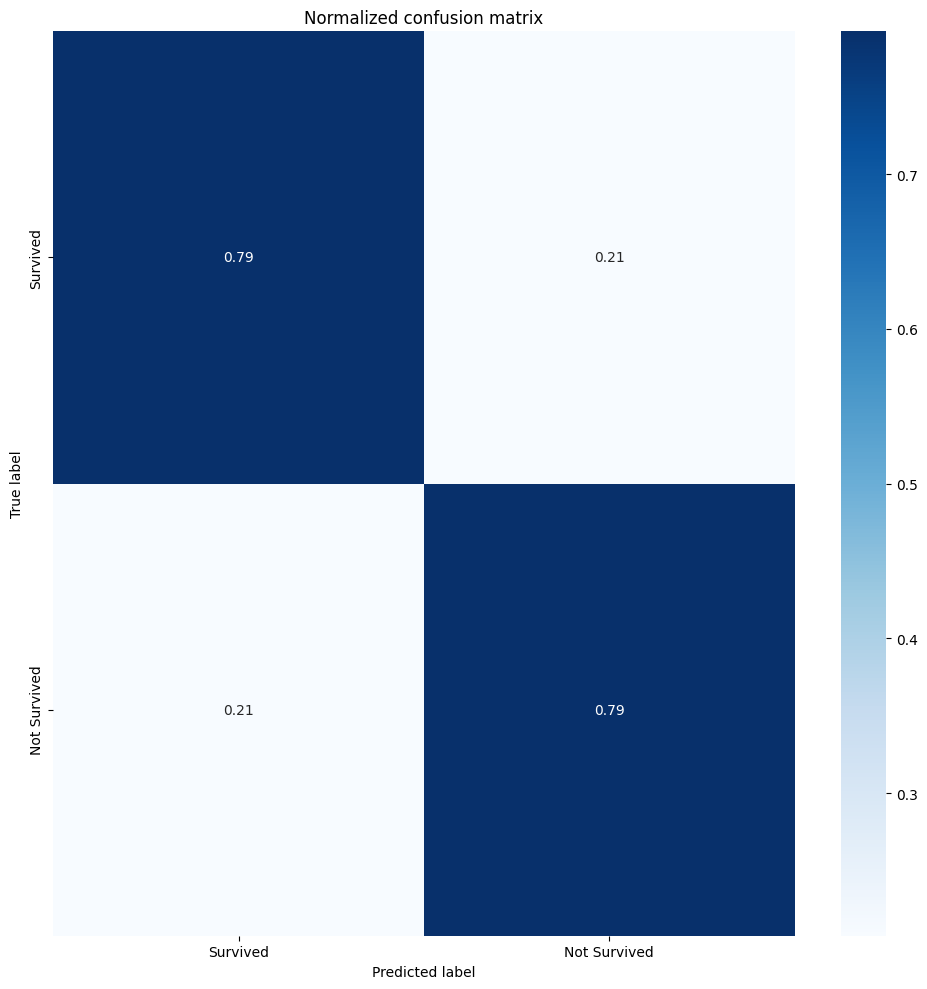

In [41]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

predictions = predict(X_val, tree)
plot_confusion_matrix(y_val, predictions, classes=["Survived", "Not Survived"], normalize=True, title='Normalized confusion matrix')


#### Task-8: Compute precision, recall, F1-score of the Decsision Tree on the test split. (3 points)

In [42]:
def compute_metrics(y_true, y_pred, classes):
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, labels=classes)
    metrics = {'class': classes, 'precision': precision, 'recall': recall, 'f1_score': f1_score}
    return metrics

metrics = compute_metrics(y_val, predictions, classes=[0, 1])

for i, class_label in enumerate(["Survived", "Not Survived"]):
    print(f"Class: {class_label}")
    print(f"Precision: {metrics['precision'][i]}")
    print(f"Recall: {metrics['recall'][i]}")
    print(f"F1-score: {metrics['f1_score'][i]}")
    print()

Class: Survived
Precision: 0.8333333333333334
Recall: 0.7920792079207921
F1-score: 0.8121827411167514

Class: Not Survived
Precision: 0.7439024390243902
Recall: 0.7922077922077922
F1-score: 0.7672955974842767



### Experiment 2:

In [43]:
tree = build_tree(X= X_train, y= y_train, max_depth = 20, feature_types = feature_types_train)

Streaming output truncated to the last 5000 lines.
Split Column : Title, Split Point : 3
Title 3
Split Column : Title, Split Point : 4
Title 4
Split Column : Title, Split Point : 5
Title 5
Split Column : FamilySize, Split Point : 1
FamilySize 1
Split Column : FamilySize, Split Point : 2
FamilySize 2
Split Column : FamilySize, Split Point : 3
FamilySize 3
Split Column : FamilySize, Split Point : 4
FamilySize 4
Split Column : FamilySize, Split Point : 5
FamilySize 5
Split Column : FamilySize, Split Point : 6
FamilySize 6
Split Column : IsAlone, Split Point : 0
IsAlone 0
Split Column : IsAlone, Split Point : 1
IsAlone 1
Split Column : Pclass, Split Point : 1
Pclass 1
Split Column : Pclass, Split Point : 2
Pclass 2
Split Column : Sex, Split Point : 0
Sex 0
Split Column : Sex, Split Point : 1
Sex 1
Split Column : Age, Split Point : 0.67
Age 0.67
Split Column : Age, Split Point : 1.0
Age 1.0
Split Column : Age, Split Point : 2.0
Age 2.0
Split Column : Age, Split Point : 3.0
Age 3.0
Split Col

In [44]:
print(score(X_val, y_val, tree))

(0.8539325842696629, array([0.93069307, 0.75324675]))


#### Combining test and val for the final experiments

In [45]:
X_combined = pd.concat([X_train, X_val], axis=0, ignore_index=True)

y_combined = pd.concat([y_train, y_val], axis=0, ignore_index=True)

display(X_combined.head(2))
display(y_combined.head(2))

Pclass  Sex   Age      Fare  Cabin  Emb_Q  Emb_S  Title  FamilySize  \
0       1    1   4.0  4.404990      0      0      1      4           3   
1       3    1  28.0  2.066331     -1      0      1      1           1   

   IsAlone  
0        0  
1        1

0    1
1    0
Name: Survived, dtype: int64

### Final Testing:

In [46]:
tree_final = build_tree(X= X_combined, y= y_combined, max_depth = 10, min_samples_split=50, min_gain = 0, feature_types = feature_types_train)

Streaming output truncated to the last 5000 lines.
Split Column : Fare, Split Point : 2.061048420562944
Fare 2.061048420562944
Split Column : Fare, Split Point : 2.319520869700248
Fare 2.319520869700248
Split Column : Fare, Split Point : 2.2512917986064953
Fare 2.2512917986064953
Split Column : Fare, Split Point : 2.2353763433005955
Fare 2.2353763433005955
Split Column : Fare, Split Point : 2.0652792278673315
Fare 2.0652792278673315
Split Column : Fare, Split Point : 2.221017055930222
Fare 2.221017055930222
Split Column : Fare, Split Point : 2.1972245773362196
Fare 2.1972245773362196
Split Column : Fare, Split Point : 2.221917189926591
Fare 2.221917189926591
Split Column : Cabin, Split Point : -1
Cabin -1
Split Column : Emb_Q, Split Point : 0
Emb_Q 0
Split Column : Emb_S, Split Point : 1
Emb_S 1
Split Column : Title, Split Point : 1
Title 1
Split Column : FamilySize, Split Point : 1
FamilySize 1
Split Column : FamilySize, Split Point : 2
FamilySize 2
Split Column : FamilySize, Split Po

In [47]:
print(score(X_test, y_test, tree_final))

(0.8111111111111111, array([0.91071429, 0.64705882]))


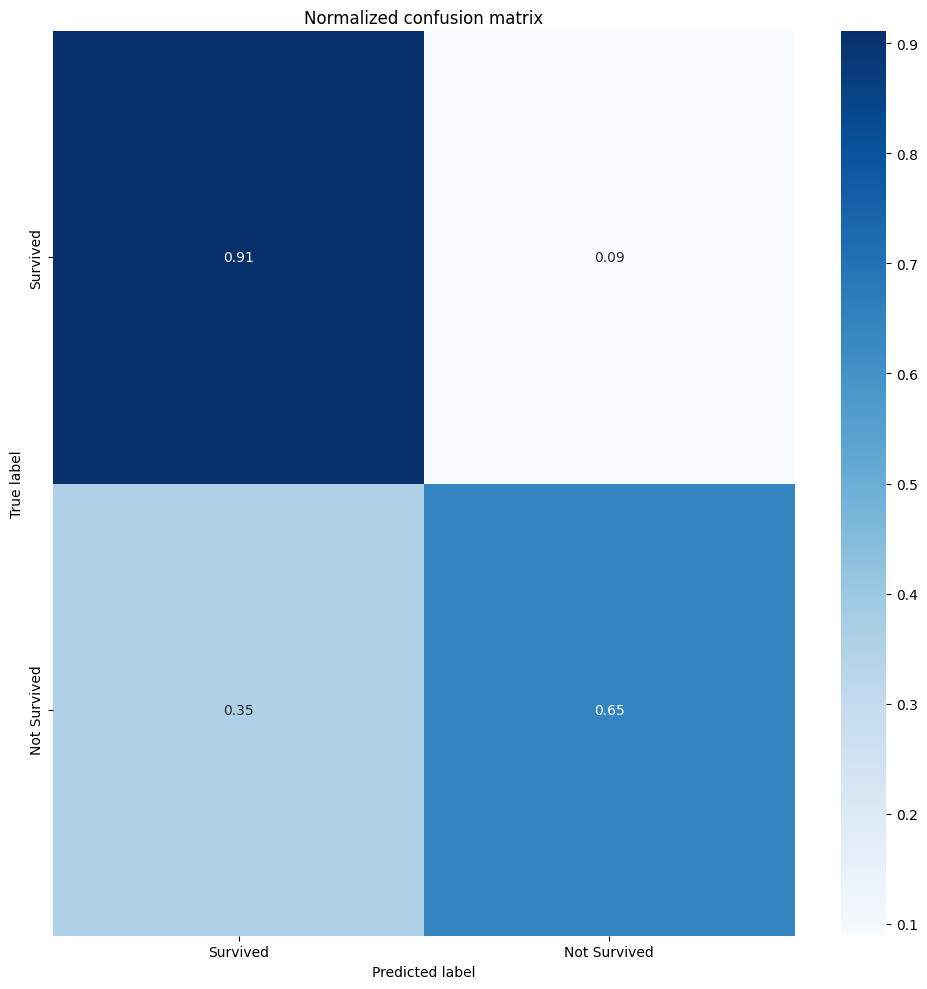

In [48]:
predictions_final = predict(X_test, tree_final)
plot_confusion_matrix(y_test, predictions_final, classes=["Survived", "Not Survived"], normalize=True, title='Normalized confusion matrix')



---



# Linear Regression 1

<li>You are given a dataset with two features: TV marketing budget and sales. <br> <li>Dataset Link: https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv
<li>Now, perform the following tasks:

## Task-1 Dataset Exploration:
<li>(a) Load the dataset and display the first few
rows.
<li>(b) Plot a scatter plot to visualize the relationship between the TV
marketing budget and sales. Comment on the trend observed in the scatter
plot.
<li>(c) Calculate and display basic statistical measures (mean, standard
deviation) for both TV marketing budget and sales. (5 Points)

### Imports

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### (a) Load the dataset and display the first few rows.

In [50]:
url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"

In [51]:
def fetch_data(url):
    return pd.read_csv(url, sep = ",", header = 0)

In [52]:
df = fetch_data(url)

In [53]:
display(df)

TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]

#### (b) Plot a scatter plot to visualize the relationship between the TV marketing budget and sales.

<Axes: xlabel='TV', ylabel='Sales'>

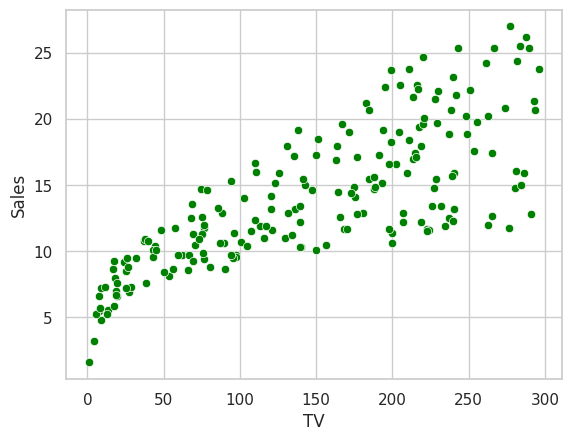

In [54]:
import seaborn

seaborn.set(style='whitegrid')
seaborn.scatterplot(x="TV", y="Sales", data=df, color = "green")
# seaborn.relplot(x = "TV", y = "Sales", data = df, height=10, aspect=3)

#### Correlation Matrix

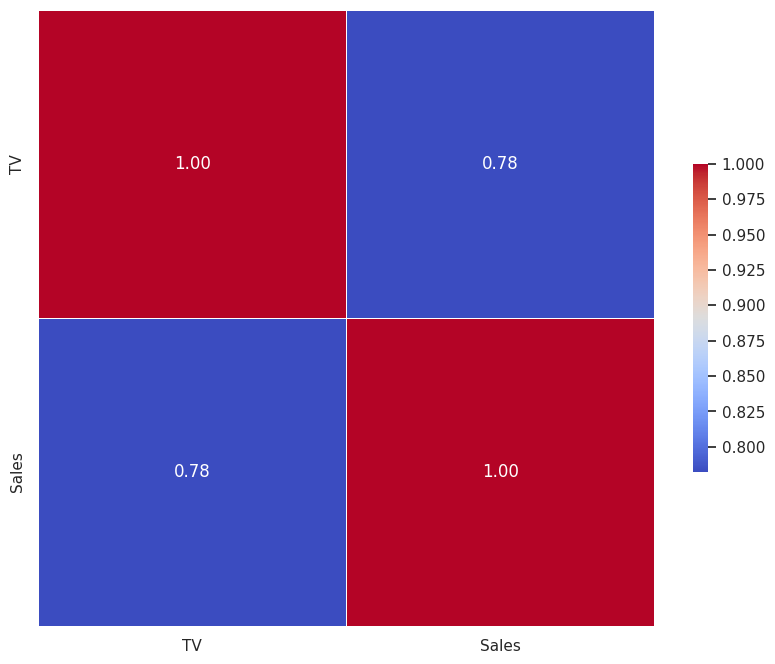

In [55]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### (c) Calculate and display basic statistical measures (mean, standard deviation) for both TV marketing budget and sales. (5 Points)

In [56]:
df.describe()

TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000

## Task-2: Data Preprocessing:

#### (a) Check for any missing values in the dataset and handle them appropriately.

In [57]:
print(df.isna().sum())

TV       0
Sales    0
dtype: int64


#### No missing values.

#### (b) Normalize the TV marketing budget and sales columns if needed.

In [58]:
X = df.values[:,0]
y = df.values[:,1]
print(X[4], y[4])

180.8 12.9


#### Standard Normalization

In [59]:
def standardize_data(x, y):
    X = (x - np.mean(x)) / np.std(x)
    Y = (y - np.mean(y)) / np.std(y)
    return X, Y

#### Min-Max Normalization

In [60]:
def normalize_data(x, y):
    X_norm = (x - np.min(x)) / (np.max(x) - np.min(x))
    Y_norm = (y - np.min(y)) / (np.max(y) - np.min(y))
    return X_norm, Y_norm

In [61]:
X, y = normalize_data(X, y)
print(X, y)

[0.77578627 0.1481231  0.0557998  0.50997633 0.60906324 0.02705445
 0.19208657 0.4041258  0.02671627 0.67331755 0.2211701  0.72370646
 0.07811972 0.32735881 0.68785932 0.65843761 0.22691917 0.94927291
 0.2316537  0.49577274 0.73621914 0.80047345 0.04227257 0.76969902
 0.20831924 0.8867095  0.4808928  0.80960433 0.83902604 0.23638823
 0.98816368 0.37943862 0.32634427 0.89584038 0.32127156 0.98072371
 0.90023673 0.25025364 0.14338857 0.76868448 0.68244843 0.59621238
 0.99053094 0.69732837 0.08251606 0.58978695 0.30098072 0.80892797
 0.76597903 0.22387555 0.67331755 0.33716605 0.72945553 0.61515049
 0.88603314 0.67027393 0.02231992 0.4582347  0.71051742 0.71017924
 0.17855935 0.88129861 0.80689888 0.3449442  0.44098749 0.23097734
 0.10415962 0.4687183  0.80047345 0.73080825 0.67095029 0.36895502
 0.08826513 0.43523842 0.71931011 0.05478526 0.0906324  0.40514034
 0.01589449 0.38992222 0.25600271 0.80858979 0.25228272 0.22894826
 0.71964829 0.65099763 0.25566452 0.37199865 0.2962462  0.3689

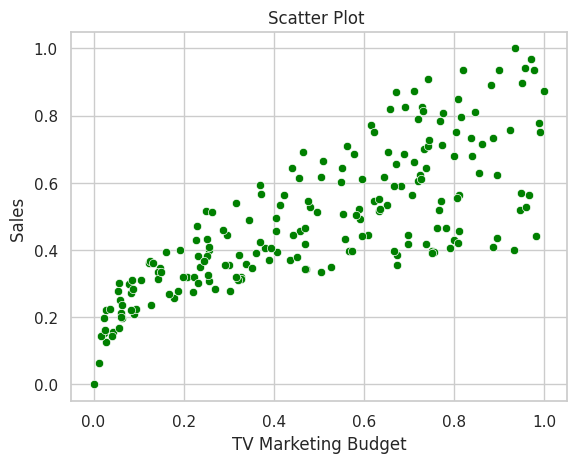

In [62]:
import seaborn

seaborn.set(style='whitegrid')
seaborn.scatterplot(x=X, y=y, color = "green")

plt.title('Scatter Plot ')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales ')

plt.show()

#### (c) Split the dataset into training and testing sets using 80-20 split. (5 Points)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
print(X_train)
print(y_train)

[0.04193439 0.30334799 0.06087251 0.68785932 0.02231992 0.49577274
 0.26208996 0.76868448 0.69090294 0.77375719 0.9773419  0.41393304
 0.06323977 0.61515049 0.89584038 0.55765979 0.73655732 0.08217788
 0.78254988 0.14305039 0.46838011 0.4687183  0.01589449 0.99053094
 0.94927291 0.02705445 0.26885357 0.46398377 0.76597903 0.10415962
 0.88603314 0.71964829 0.97024011 0.03719986 0.05816706 0.70645925
 0.07811972 0.25600271 0.84612783 0.47548191 0.63273588 0.45180927
 0.80858979 0.75515725 0.25295908 0.32735881 0.25228272 0.02603991
 0.64389584 0.58978695 0.45485289 0.90023673 0.2874535  0.46939466
 0.57693608 0.63307406 0.12681772 0.59621238 0.12614136 0.56712885
 0.05478526 0.80047345 0.09435238 0.66587758 0.0557998  0.67095029
 0.65099763 0.94690565 0.19208657 0.59181603 0.77578627 0.01149814
 0.40514034 0.23097734 0.67027393 0.69699019 0.2962462  0.
 0.30098072 0.80689888 0.71931011 0.73385188 0.82008793 0.58099425
 0.35136963 0.37199865 0.52722354 0.4721001  0.39398039 0.2211701
 0.3

## Task-3: Linear Regression Implementation:

#### (a) Implement the hypothesis function for linear regression(y = w1x + w0) using Gradient Descent. Use mean squared error (MSE) cost function.

In [65]:
def mean_squared_error(y_hat, y_predicted):
    mse = np.mean((y_predicted-y_hat)**2)
    return mse

In [66]:
def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

In [67]:
def compute_gradients(x, y_hat, y_pred):
    db = np.mean(-2*(y_hat - y_pred))          # derivative of loss function (mse) w.r.t b
    dw = np.mean(-2*(x*(y_hat - y_pred)))
    return dw, db

In [68]:
def weight_update(w, b, db, dw, learning_rate):
    w_new = w - learning_rate*dw
    b_new = b - learning_rate*db
    return w_new, b_new

In [69]:
def gradient_descent(w, b, X_train, y_train, epochs, learning_rate):
    for i in range(epochs):
      # for x, y in enumerate(zip(X_train, y_train)): #will add batch training if there's time
          y_pred = w*X_train + b
          mse = mean_squared_error(y_train, y_pred)
          print(f"Iteration : {i+1}, Computed Loss : {mse}")
          dw, db = compute_gradients(X_train, y_train,y_pred)
          print(f"Iteration : {i+1}, dw : {dw}, db : {db}")
          w, b = weight_update(w, b, db, dw, learning_rate)
          print(f"New Weights : w {w} and b: {b}")
    return w, b

In [70]:
def predictions(w, b, X):
    y_predict= w*X + b
    return y_predict

#### Training Loop

In [71]:
epochs = 1000
learning_rate = 0.01
w, b = 0, 0
w, b = gradient_descent(w, b, X_train, y_train, epochs, learning_rate)

Iteration : 1, Computed Loss : 0.27606349587699175
Iteration : 1, dw : -0.560580525591217, db : -0.9615157480314961
New Weights : w 0.00560580525591217 and b: 0.00961515748031496
Iteration : 2, Computed Loss : 0.26382988502121324
Iteration : 2, dw : -0.547822764424855, db : -0.9369168839961436
New Weights : w 0.011084032900160721 and b: 0.0189843263202764
Iteration : 3, Computed Loss : 0.2521970915438379
Iteration : 3, dw : -0.5353813619217117, db : -0.912932175347548
New Weights : w 0.01643784651937784 and b: 0.028113648073751878
Iteration : 4, Computed Loss : 0.24113553521618578
Iteration : 4, dw : -0.5232484333022196, db : -0.8895463092847702
New Weights : w 0.021670330852400034 and b: 0.03700911116659958
Iteration : 5, Computed Loss : 0.23061709234671782
Iteration : 5, dw : -0.5114162903597009, db : -0.8667443547735865
New Weights : w 0.026784493755997042 and b: 0.045676554714335446
Iteration : 6, Computed Loss : 0.2206150240602454
Iteration : 6, dw : -0.4998774365595933, db : -0.8

### <i> Loss converges around 0.38 for standardized data and converges around 0.016 for min-max normalized data.</i>

In [72]:
y_pred = predictions(w, b, X_train)

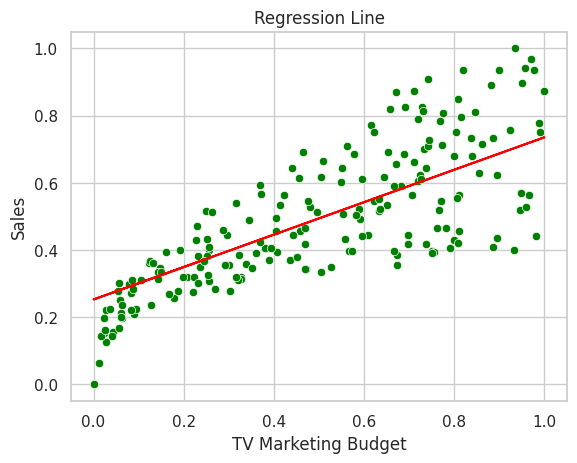

In [73]:
seaborn.set(style='whitegrid')
seaborn.scatterplot(x=X, y=y, color="green")

# Plot the line on top of the scatter plot
plt.plot(X_train, y_pred, color="red")  # You can change the color and style of the line if needed

# Set the title and labels for the axes
plt.title('Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')

plt.show()

In [74]:
# print(y_pred, X_train)

In [75]:
print((w*X_train[0] + b)*np.std(y) + np.mean(y))

0.5450434524423614


### Task-4: Evaluation: On test split compute mean square error and absolute error. (2 Points)

In [76]:
y_test_pred = predictions(w, b, X_test)

In [77]:
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.01585809761071221
MAE: 0.09514397976339875




---



# Linear Regression -2

### Imports

In [78]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Sources
<li> https://realpython.com/python-web-scraping-practical-introduction/ : Reading data from the webpage.

## Task-1 Dataset Exploration:
<li> (a) Load the dataset and display the first few
rows.
<li> (b) Plot a scatter plot to visualize the relationship between the TV
marketing budget and sales. Comment on the trend observed in the scatter
plot.
<li> (c) Calculate and display basic statistical measures (mean, standard
deviation) for both TV marketing budget and sales. (5 Points)

#### Data-Fetching

In [79]:
url = "http://lib.stat.cmu.edu/datasets/boston"

In [80]:
page = urlopen(url)
print(page)
dir(page) #checking the methods of this object

['__abstractmethods__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_abc_impl',
 '_checkClosed',
 '_checkReadable',
 '_checkSeekable',
 '_checkWritable',
 '_check_close',
 '_close_conn',
 '_get_chunk_left',
 '_method',
 '_peek_chunked',
 '_read1_chunked',
 '_read_and_discard_trailer',
 '_read_chunked',
 '_read_next_chunk_size',
 '_read_status',
 '_readinto_chunked',
 '_safe_read',
 '_safe_readinto',
 'begin',
 'chunk_left',
 'chunked',
 'close',
 'closed',
 'code',
 'debuglevel',
 'detach',
 'fileno',
 'flush',
 'fp',
 'getcode',
 'getheader',
 'getheaders',
 'geturl',
 'headers',
 'info',
 'isatty',
 'isclosed',
 '

In [81]:
source_bytes = page.read()
print(source_bytes)

b" The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\n prices and the demand for clean air', J. Environ. Economics & Management,\n vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n ...', Wiley, 1980.   N.B. Various transformations are used in the table on\n pages 244-261 of the latter.\n\n Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by

In [82]:
source = source_bytes.decode("utf-8")
lines = source.split("\n")
# print(lines)
# for line in lines:
    # print(line)
data = lines[22:]
# for line in data:
    # print(line)
lines = []
# print(data[0])
print(len(data))
for i in range(0, len(data)-1, 2):
    print("Iter", i)
    line = data[i] + " " + data[i+1]
    print(line)
    line = line.split()
    lines.append(line)

1013
Iter 0
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30   396.90   4.98  24.00
Iter 2
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80   396.90   9.14  21.60
Iter 4
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80   392.83   4.03  34.70
Iter 6
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70   394.63   2.94  33.40
Iter 8
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70   396.90   5.33  36.20
Iter 10
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70   394.12   5.21  28.70
Iter 12
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20   395.60  12.43  22.90
Iter 14
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20   396.90  19.15  27.10
Iter 16
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20   386.63  29.93  16.50
Iter 18
 0.17004  12.50   7.870  0  0

In [83]:
print(lines)

[['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00'], ['0.02731', '0.00', '7.070', '0', '0.4690', '6.4210', '78.90', '4.9671', '2', '242.0', '17.80', '396.90', '9.14', '21.60'], ['0.02729', '0.00', '7.070', '0', '0.4690', '7.1850', '61.10', '4.9671', '2', '242.0', '17.80', '392.83', '4.03', '34.70'], ['0.03237', '0.00', '2.180', '0', '0.4580', '6.9980', '45.80', '6.0622', '3', '222.0', '18.70', '394.63', '2.94', '33.40'], ['0.06905', '0.00', '2.180', '0', '0.4580', '7.1470', '54.20', '6.0622', '3', '222.0', '18.70', '396.90', '5.33', '36.20'], ['0.02985', '0.00', '2.180', '0', '0.4580', '6.4300', '58.70', '6.0622', '3', '222.0', '18.70', '394.12', '5.21', '28.70'], ['0.08829', '12.50', '7.870', '0', '0.5240', '6.0120', '66.60', '5.5605', '5', '311.0', '15.20', '395.60', '12.43', '22.90'], ['0.14455', '12.50', '7.870', '0', '0.5240', '6.1720', '96.10', '5.9505', '5', '311.0', '15.20', '396.90', '19.15', '27.10'], ['

#### (a) Load the dataset and display the first few rows.

In [84]:
data = pd.DataFrame(lines, columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV"
]
)
display(data)

CRIM     ZN   INDUS CHAS     NOX      RM    AGE     DIS RAD    TAX  \
0    0.00632  18.00   2.310    0  0.5380  6.5750  65.20  4.0900   1  296.0   
1    0.02731   0.00   7.070    0  0.4690  6.4210  78.90  4.9671   2  242.0   
2    0.02729   0.00   7.070    0  0.4690  7.1850  61.10  4.9671   2  242.0   
3    0.03237   0.00   2.180    0  0.4580  6.9980  45.80  6.0622   3  222.0   
4    0.06905   0.00   2.180    0  0.4580  7.1470  54.20  6.0622   3  222.0   
..       ...    ...     ...  ...     ...     ...    ...     ...  ..    ...   
501  0.06263   0.00  11.930    0  0.5730  6.5930  69.10  2.4786   1  273.0   
502  0.04527   0.00  11.930    0  0.5730  6.1200  76.70  2.2875   1  273.0   
503  0.06076   0.00  11.930    0  0.5730  6.9760  91.00  2.1675   1  273.0   
504  0.10959   0.00  11.930    0  0.5730  6.7940  89.30  2.3889   1  273.0   
505  0.04741   0.00  11.930    0  0.5730  6.0300  80.80  2.5050   1  273.0   

    PTRATIO       B LSTAT   MEDV  
0     15.30  396.90  4.98  24.00  
1     17.80  396.90  9.14  21.60  
2     17.80  392.83  4.03  34.70  
3     18.70  394.63  2.94  33.40  
4     18.70  396.90  5.33  36.20  
..      ...     ...   ...    ...  
501   21.00  391.99  9.67  22.40  
502   21.00  396.90  9.08  20.60  
503   21.00  396.90  5.64  23.90  
504   21.00  393.45  6.48  22.00  
505   21.00  396.90  7.88  11.90  

[506 rows x 14 columns]

#### (b) Plot a scatter plot to visualize the relationship between the TV marketing budget and sales. Comment on the trend observed in the scatter plot.

In [85]:
# Scatter Plots have been plotted below after normalization.

### (c) Calculate and display basic statistical measures (mean, standard deviation) for both TV marketing budget and sales.

In [86]:
data.describe()

CRIM    ZN   INDUS CHAS     NOX      RM     AGE     DIS  RAD  \
count       506   506     506  506     506     506     506     506  506   
unique      504    26      76    2      81     446     356     412    9   
top     0.01501  0.00  18.100    0  0.5380  5.7130  100.00  3.4952   24   
freq          2   372     132  471      23       3      43       5  132   

          TAX PTRATIO       B LSTAT   MEDV  
count     506     506     506   506    506  
unique     66      46     357   455    229  
top     666.0   20.20  396.90  7.79  50.00  
freq      132     140     121     3     16

In [87]:
statistics_df = data.describe().transpose()
statistics_df.reset_index(inplace=True)
statistics_df.rename(columns={'index': 'Column'}, inplace=True)

display(statistics_df)

Column count unique      top freq
0      CRIM   506    504  0.01501    2
1        ZN   506     26     0.00  372
2     INDUS   506     76   18.100  132
3      CHAS   506      2        0  471
4       NOX   506     81   0.5380   23
5        RM   506    446   5.7130    3
6       AGE   506    356   100.00   43
7       DIS   506    412   3.4952    5
8       RAD   506      9       24  132
9       TAX   506     66    666.0  132
10  PTRATIO   506     46    20.20  140
11        B   506    357   396.90  121
12    LSTAT   506    455     7.79    3
13     MEDV   506    229    50.00   16

## Task-2: Data Preprocessing:
<li> (a) Check for any missing values in the dataset
and handle them appropriately.
<li> (b) Normalize the TV marketing budget and
sales columns if needed.
<li> (c) Split the dataset into training and testing sets
using 80-20 split. (5 Points)

#### (a) Check for any missing values in the dataset and handle them appropriately.

In [88]:
def check_for_missing_values(df):
    missing = {}
    for col in df.columns:
        if df[col].isna().sum():
            val = df[col].isna().sum()
            missing[col] = val
            print(f"Missing in {col} : {val} ")
        else:
          # print("none")
          pass
    return

In [89]:
missing = check_for_missing_values(data)
print(missing)

None


#### (b) Normalize the TV marketing budget and sales columns if needed.

In [90]:
def min_max_normalize_dataframe(df):
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(normalized_array, index=df.index, columns=df.columns)
    return normalized_df

In [91]:
def standard_normalize_dataframe(df):
    scaler = StandardScaler()
    standardized_array = scaler.fit_transform(df)
    standardized_df = pd.DataFrame(standardized_array, index=df.index, columns=df.columns)
    return standardized_df

In [92]:
def min_max_normalize_dataframe(df):
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(df)
    normalized_df = pd.DataFrame(normalized_array, index=df.index, columns=df.columns)
    return normalized_df

In [93]:
data_min_max = min_max_normalize_dataframe(data)

X = data_min_max.iloc[:, :-1]  # Features
y = data_min_max.iloc[:, -1] # Target variable

display(X.head(5))
display(y.head(5))

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  
3  0.086957  0.066794  0.648936  0.994276  0.033389  
4  0.086957  0.066794  0.648936  1.000000  0.099338

0    0.422222
1    0.368889
2    0.660000
3    0.631111
4    0.693333
Name: MEDV, dtype: float64

#### (c) Split the dataset into training and testing sets using 80-20 split. (5 Points)

In [94]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### (b) Plot a scatter plot to visualize the relationship between the TV marketing budget and sales. Comment on the trend observed in the scatter plot.

---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------
---------------------------------------------------


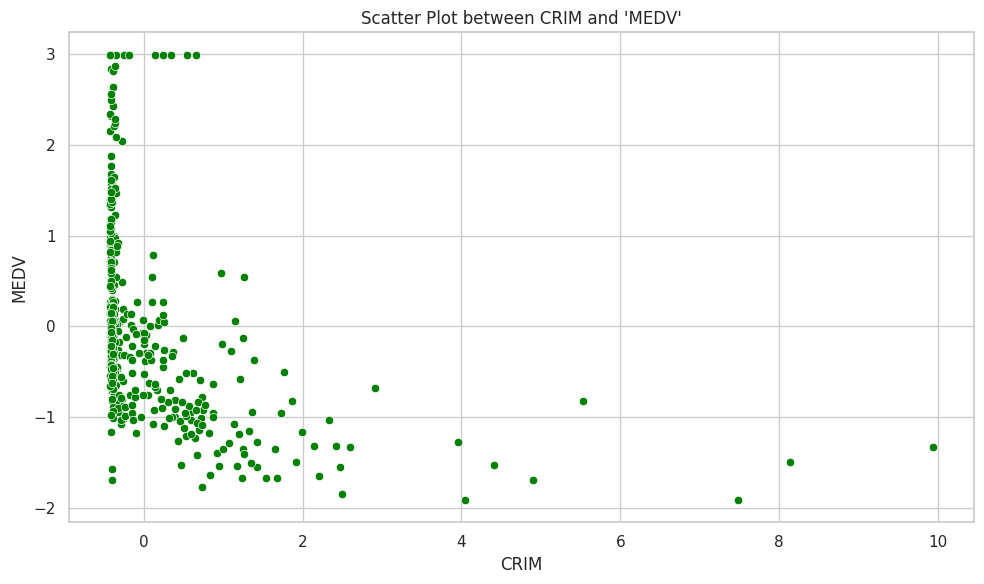

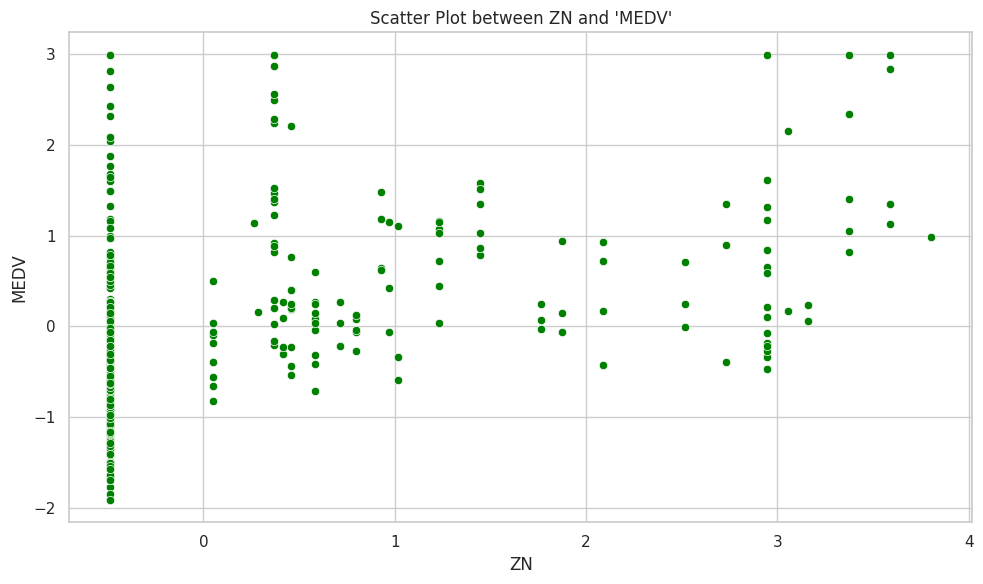

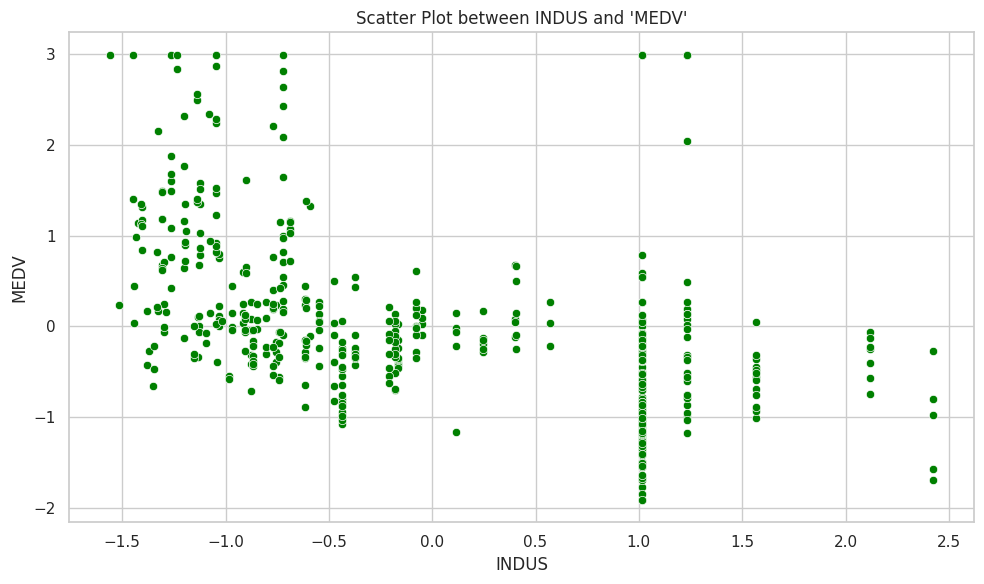

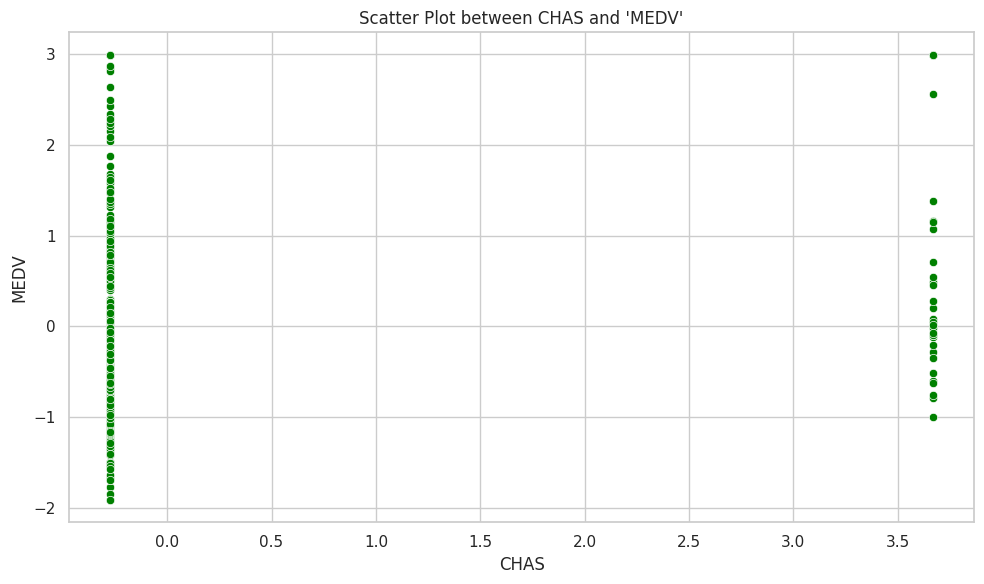

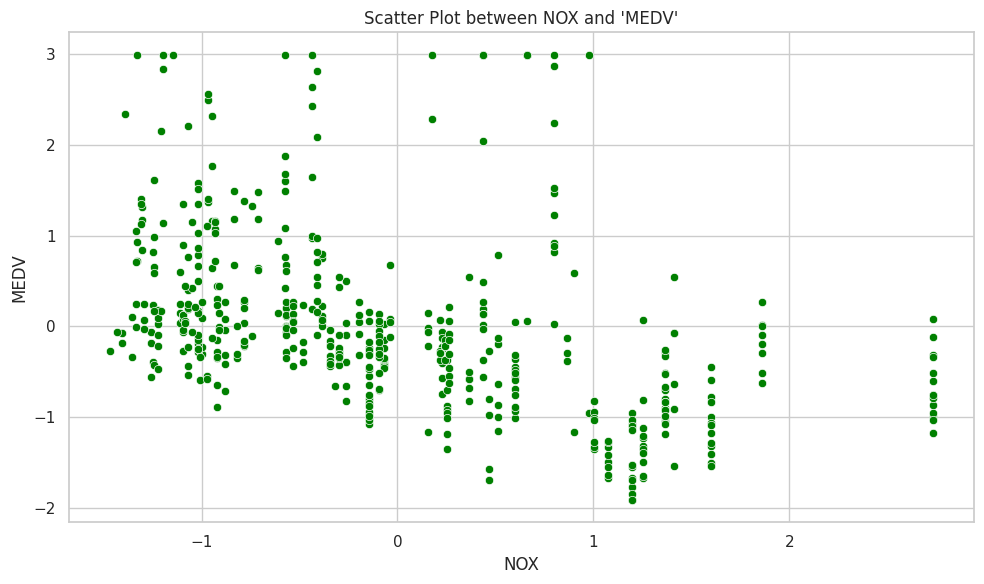

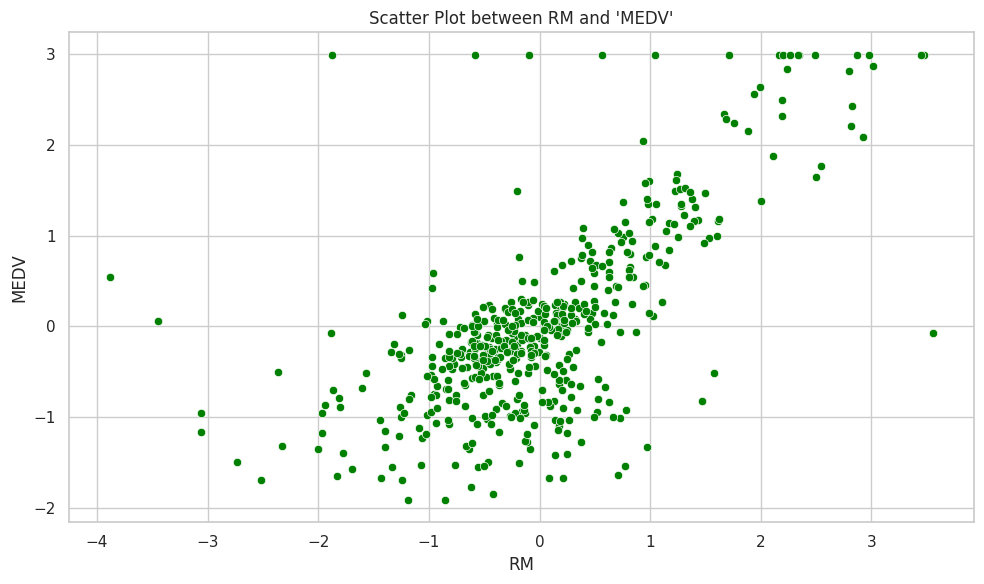

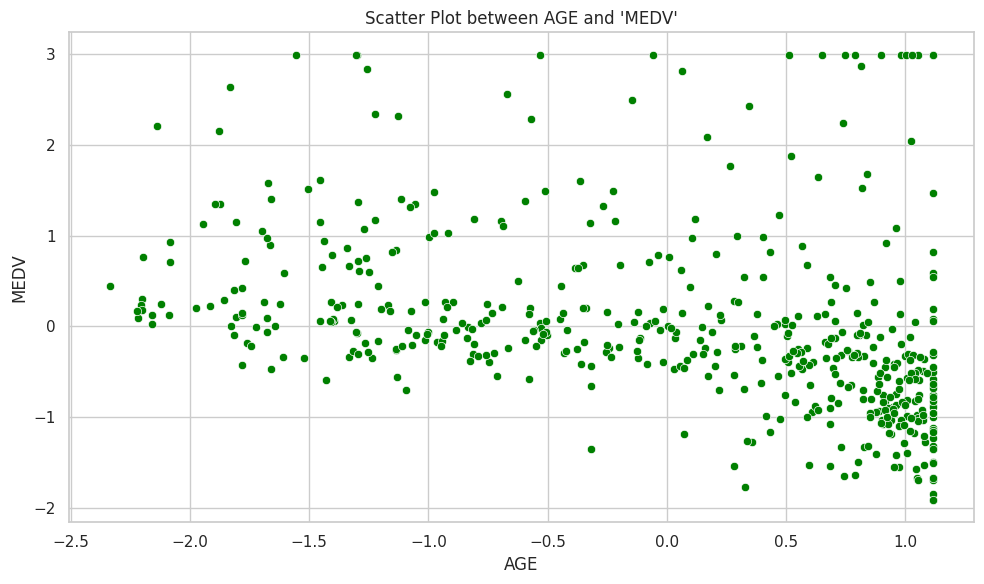

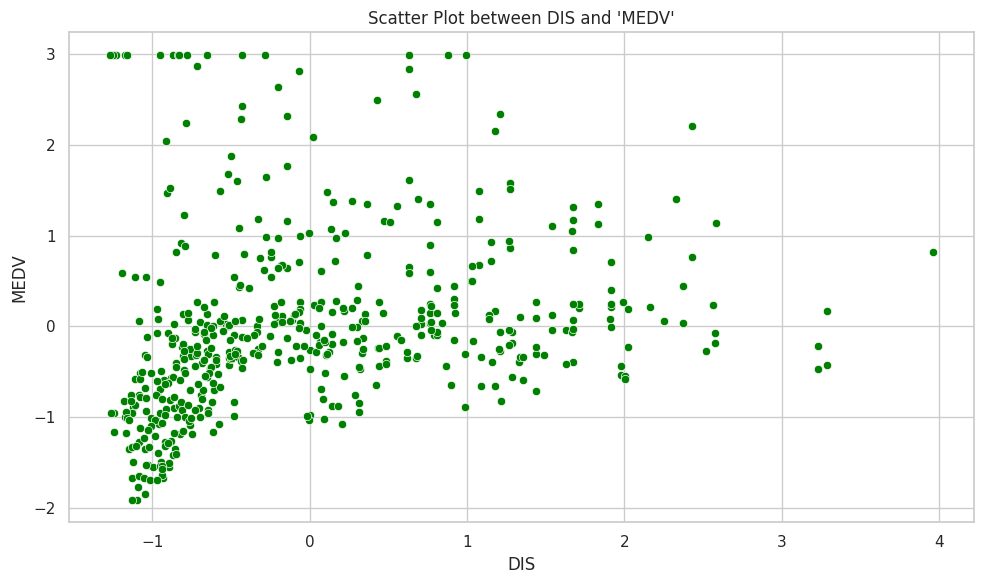

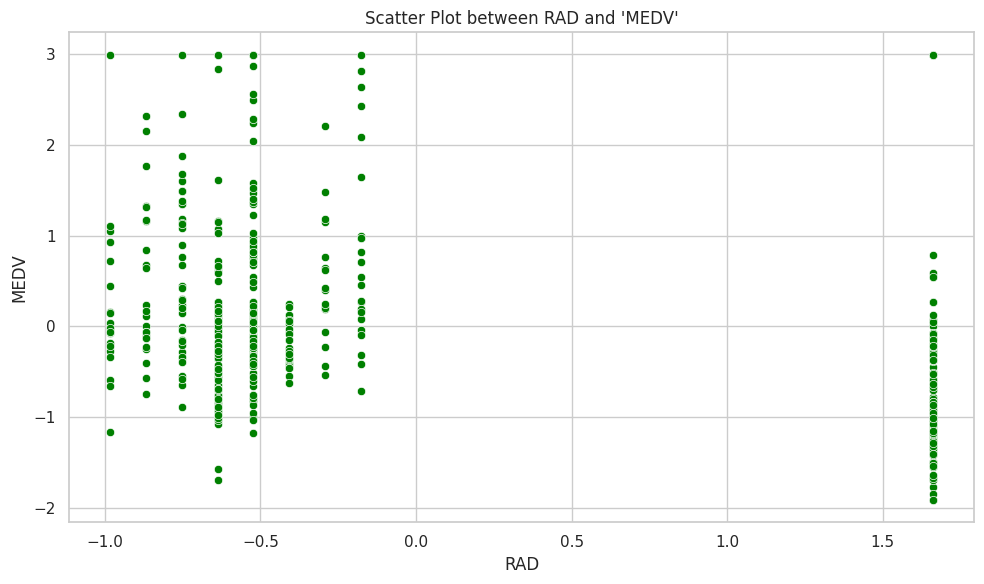

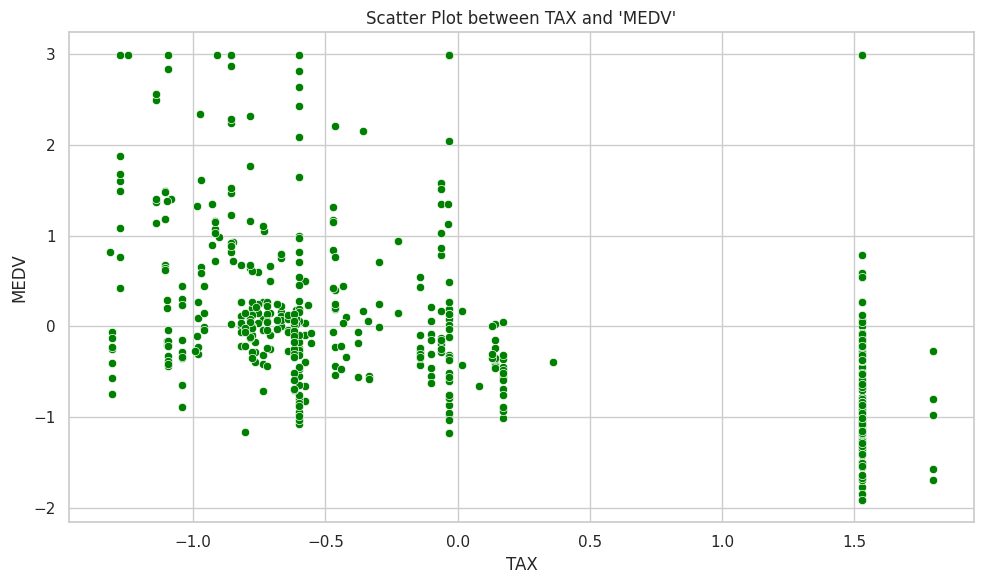

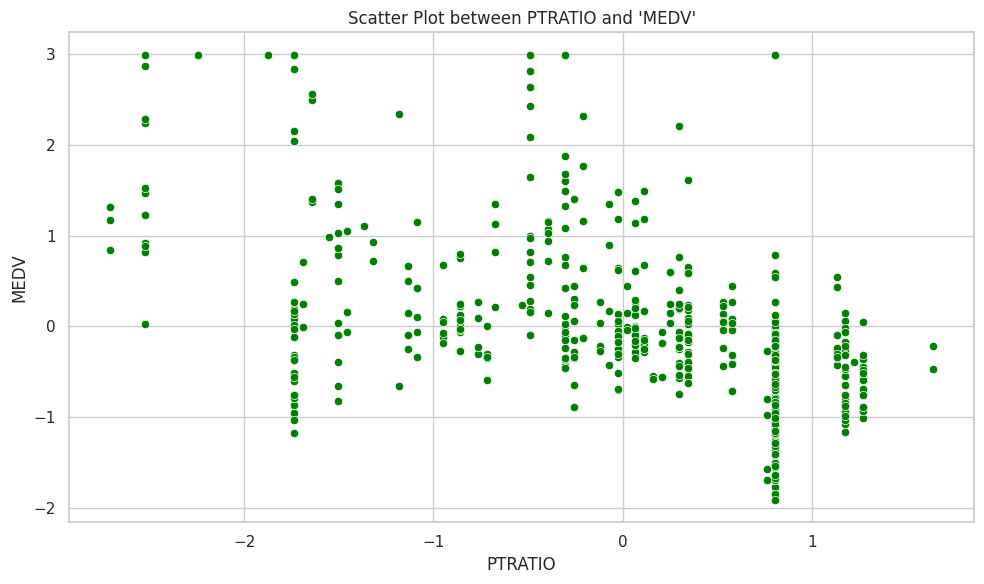

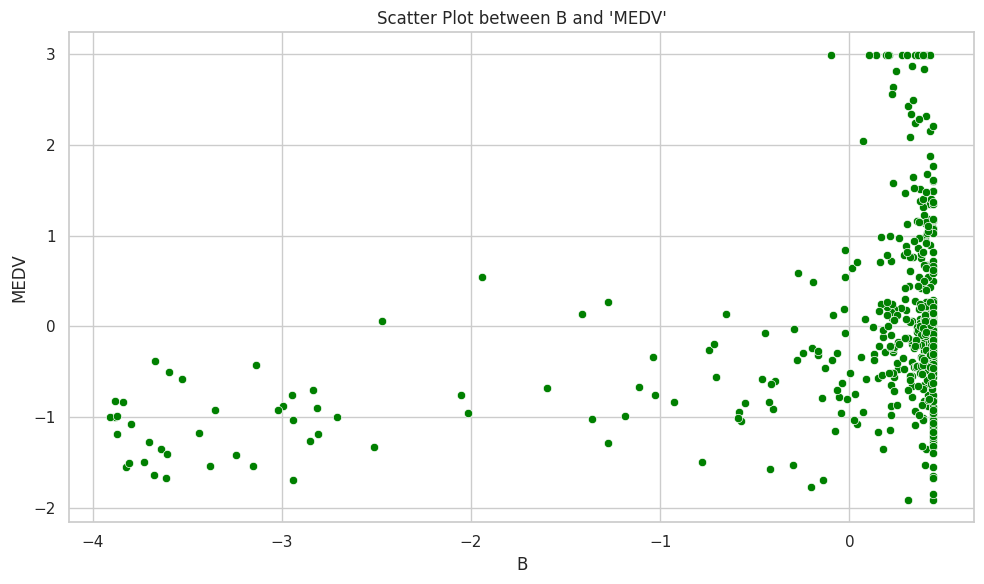

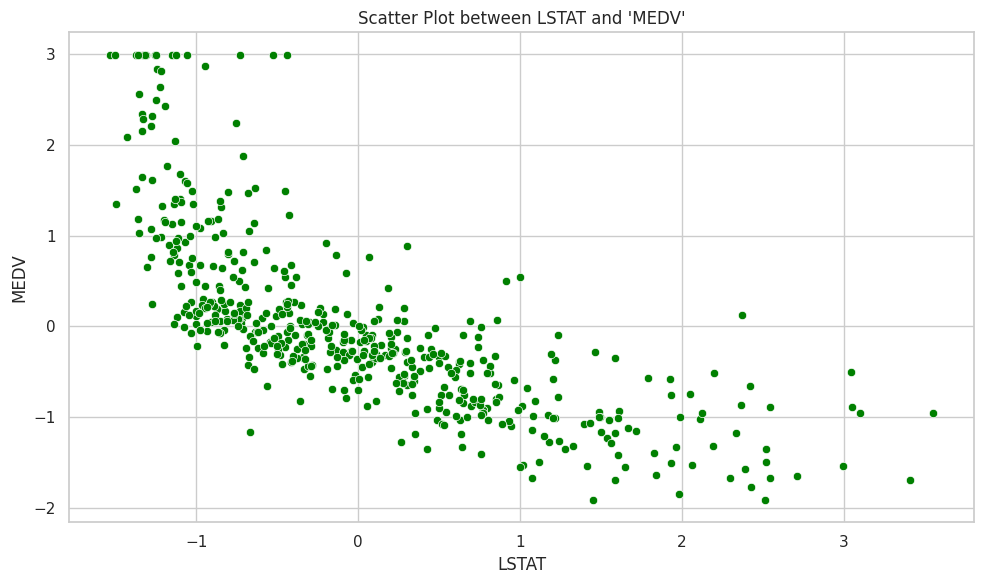

In [95]:
std_data = standard_normalize_dataframe(data)
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 6))
    seaborn.set(style='whitegrid')
    seaborn.scatterplot(x=feature, y="MEDV", data=std_data, color = "green")
    plt.title(f"Scatter Plot between {feature} and 'MEDV'")
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.tight_layout()
    print("---------------------------------------------------")

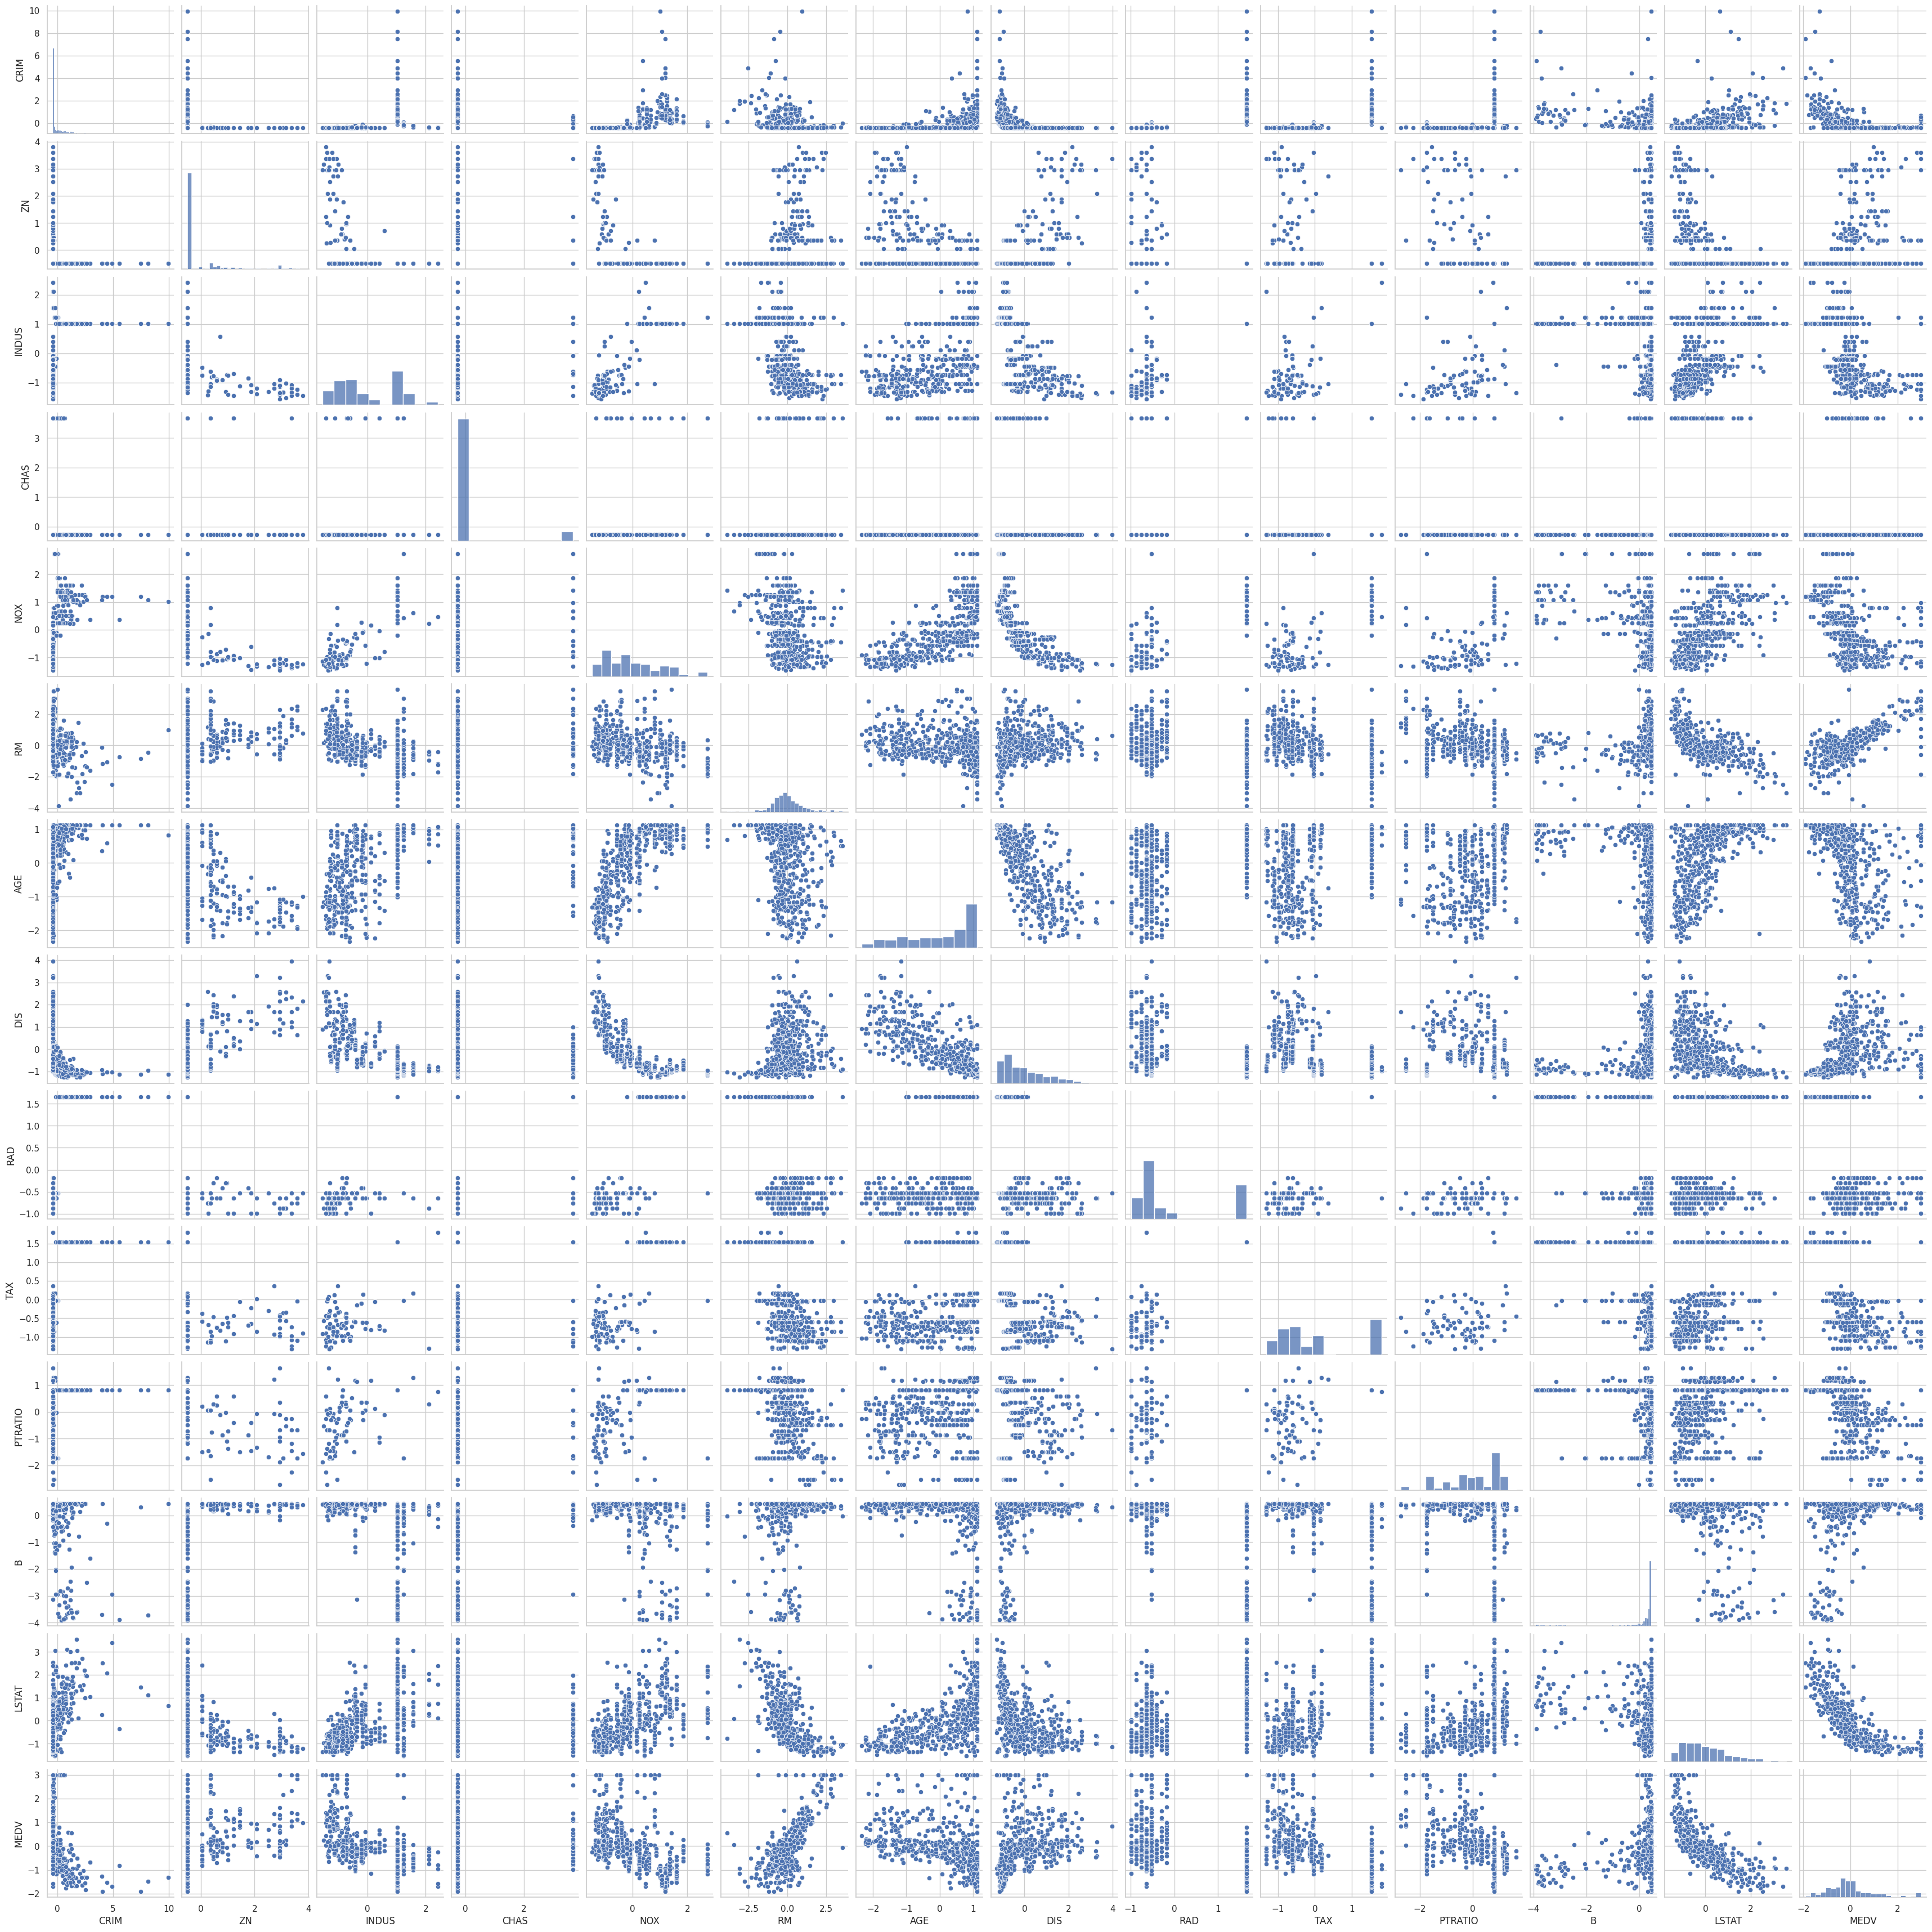

In [96]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
# Generate the pair plot
seaborn.pairplot(std_data[features])
# Display the plot
plt.show()

#### handling type errors

In [97]:
print(y_train.dtypes)
print(y_test.dtypes)

float64
float64


In [98]:
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

## Task-3: Linear Regression Implementation:

#### (a) Implement the hypothesis function for linear regression(y = w1x + w0) using Gradient Descent. Use mean squared error (MSE) cost function. (b) Plot the regression line on the scatter plot from Task-1. (8 Points)

In [99]:
def initialize_parameters(n):
    w = np.zeros(shape=(n, 1))
    b = 0
    return w, b

In [100]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = np.dot(X, w) + b
    cost = (1/(2*m)) * np.sum((y_hat - y)**2)
    return cost

In [101]:
def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []

    for i in range(epochs):
        # Predict current y_hat
        y_hat = np.dot(X, w) + b
        # Calculate gradients
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        # Record the costs
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return w, b, cost_history

In [102]:
X_train_with_intercept = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Initialize parameters
n_features = X_train_with_intercept.shape[1]
w, b = initialize_parameters(n_features)

# Gradient Descent
epochs = 1000
learning_rate = 0.01
w, b, cost_history = gradient_descent(X_train_with_intercept, y_train.values.reshape(-1,1), w, b, learning_rate, epochs)


Iteration 0: Cost 0.08919140109323503
Iteration 100: Cost 0.018865831592240506
Iteration 200: Cost 0.015372800108982893
Iteration 300: Cost 0.013461301557410807
Iteration 400: Cost 0.012324491822615472
Iteration 500: Cost 0.01157705268239519
Iteration 600: Cost 0.011033122988917732
Iteration 700: Cost 0.010602218251830116
Iteration 800: Cost 0.010239557881959007
Iteration 900: Cost 0.009922346665701116


In [103]:
print(f"Weights : {w}")
print(f"Bias : {b}")

Weights : [[ 0.13620872]
 [-0.02924838]
 [ 0.08358176]
 [-0.04395748]
 [ 0.0600984 ]
 [-0.02888185]
 [ 0.18636227]
 [-0.00337575]
 [ 0.0383222 ]
 [-0.02568733]
 [-0.04466829]
 [-0.06250762]
 [ 0.14623713]
 [-0.12968596]]
Bias : 0.13620871931700307


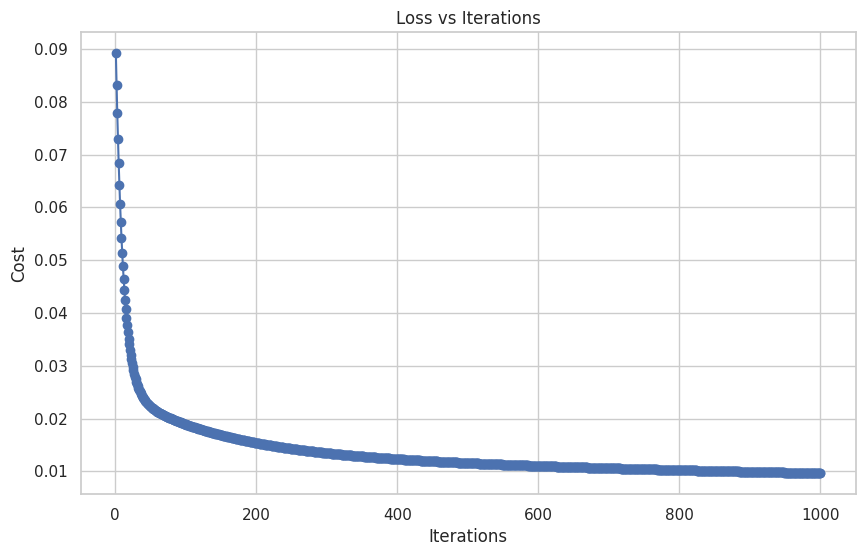

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cost_history) + 1), cost_history, marker='o', linestyle='-')
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

#### 3D Visualization by picking the most correlated features with MEDV

In [105]:
correlation_matrix = std_data.corr()
display(correlation_matrix)

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [106]:
from mpl_toolkits.mplot3d import Axes3D

# correlation matrix to find the two most correlated features with y_train
corr_matrix = np.corrcoef(X_train, rowvar=False)
y_train = np.array(y_train)
y_corr = np.corrcoef(X_train, y_train.reshape(-1, 1), rowvar=False)[:-1, -1]

# two most correlated features with y_train
feature_indices = np.argsort(np.abs(y_corr))[-2:]

print(feature_indices)
print(X_train.shape)
print(type(X_train))
# print(X_train.)

# Extract the two most correlated features for plotting
feature_1 = X_train.iloc[:, feature_indices[0]]
feature_2 = X_train.iloc[:, feature_indices[1]]
# print(feature_1)
# print(feature_2)

[ 5 12]
(404, 13)
<class 'pandas.core.frame.DataFrame'>


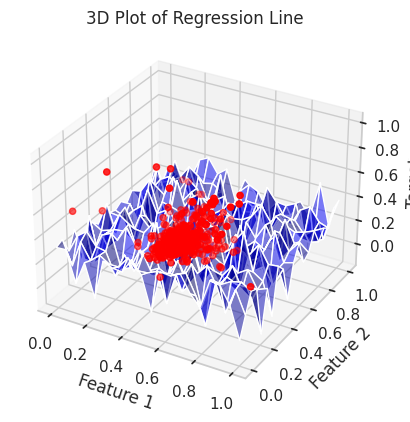

In [107]:
# Prepare 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(feature_1, feature_2, y_train, color='red', label='Actual data')

# Generate predictions for the meshgrid of the two features
X_grid_1, X_grid_2 = np.meshgrid(np.linspace(feature_1.min(), feature_1.max(), 20),
                                 np.linspace(feature_2.min(), feature_2.max(), 20))

X_grid = np.c_[np.ones(X_grid_1.ravel().shape), X_grid_1.ravel(), X_grid_2.ravel()]
predictions = np.dot(X_train_with_intercept, w)[:-4]
# print(predictions)

# Plotting the regression surface
ax.plot_surface(X_grid_1, X_grid_2, predictions.reshape(X_grid_2.shape), color='blue', alpha=0.5, label='Regression Plane')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.title('3D Plot of Regression Line')
plt.show()


#### Visualization with PCA

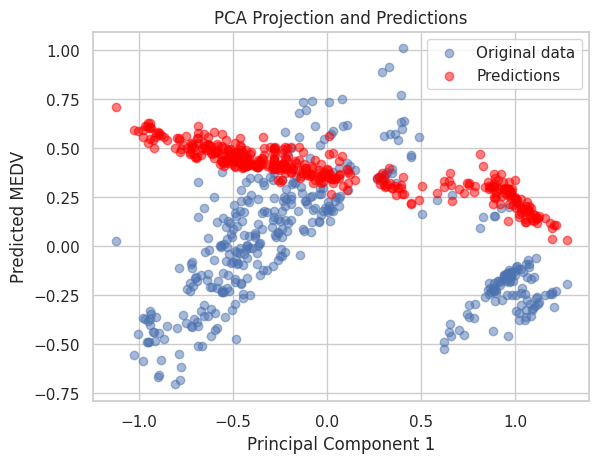

In [108]:
from sklearn.decomposition import PCA

# Perform PCA on the training data
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train_with_intercept)

# Calculate predictions using the weights and bias
predictions = np.dot(X_train_with_intercept, w) + b

# Since we cannot directly visualize the multivariate regression line in the PCA space,
# we can plot the first principal component against the predicted values.
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, label='Original data')
plt.scatter(data_pca[:, 0], predictions, alpha=0.5, color='red', label='Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Predicted MEDV')
plt.title('PCA Projection and Predictions')
plt.legend()
plt.show()

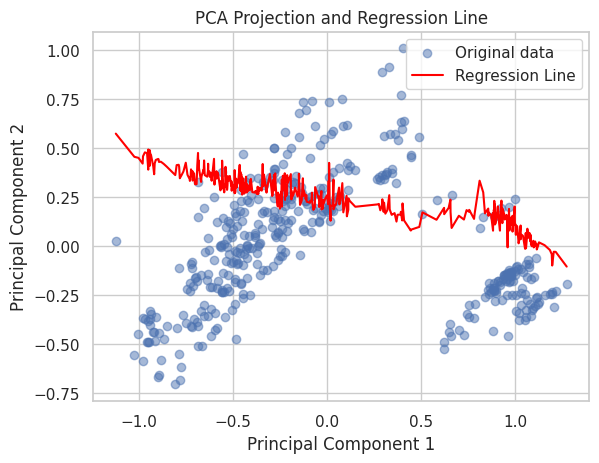

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_with_intercept)
predictions = np.dot(X_train_with_intercept, w)

# The predictions need to be plotted against the PCA-transformed features. But, since we
# cannot directly plot a multidimensional hyperplane in 2D space,
# we can create a grid of values that will represent our plane.

# Grid of values
grid_x = np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 100)
grid_y = np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 100)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

# Inverse the PCA transformation to get back to the original feature space
X_grid_pca = pca.inverse_transform(np.hstack((grid_x.reshape(-1, 1), grid_y.reshape(-1, 1))))

# Calculating predictions for each point on the grid
Z = np.dot(X_grid_pca, w)
Z = Z.reshape(grid_x.shape)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Original data')
sort_order = np.argsort(X_pca[:, 0])
plt.plot(X_pca[sort_order, 0], predictions[sort_order], color='red', label='Regression Line')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection and Regression Line')
plt.legend()
plt.show()


## Task-4: Evaluation: On test split compute mean square error and absolute error. (2 Points)

In [110]:
# Prepare test set (also add intercept term)
X_test_with_intercept = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict on test set
y_multi_test_pred = np.dot(X_test_with_intercept, w) + b

In [111]:
# print(y_multi_test_pred)
preds = np.array(y_multi_test_pred).flatten()

In [112]:
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
print("MSE:", mse)
print("MAE:", mae)

MSE: 0.024680126927729813
MAE: 0.11055379736691438




---



### THE END